# Final Project Code
## Mingjun Ma, Yiwei Jiang, Jiayue Meng, Xubin Lou

# 1. Air Passenger (real world dataset)

Description:

The AirPassenger dataset provides monthly totals of a US airline passengers, from 1949 to 1960.

This dataset has two columns: Month and number of passengers

## 1.1 Setting Up The Dataset and Descriptive Statistics

In [31]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#ignore warning massage
import warnings
warnings.filterwarnings("ignore")

#set the size of our graphs
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [32]:
#import the air passenger dataset
air_passenger_df = pd.read_csv("AirPassengers.csv")

In [33]:
#take a look for the air passenger dataset
print(air_passenger_df)
print(air_passenger_df.info())

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [34]:
#we can see, we have 144 total observations with two columns

In [35]:
#create a new column "Date", which changed the format of "Month" data to date time
#then, drop the "Month", since after we have the "Date", we do not need to use it anymore
#set the column "Date" as our index
#rename "#Passengers" to "Passengers"
air_passenger_df['Date'] = pd.to_datetime(air_passenger_df['Month'])
air_passenger_df = air_passenger_df.drop(columns = 'Month')
air_passenger_df = air_passenger_df.set_index('Date')
air_passenger_df = air_passenger_df.rename(columns = {'#Passengers':'Passengers'})

#clean our dataset by dropping null values
air_passenger_df.dropna(inplace=True)

In [36]:
#show the air passenger dataset after we change the format
#show the summary of the air passenger dataset
print(air_passenger_df.head())
print(air_passenger_df.describe())

            Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [37]:
#we can see, after clean our data, we have 144 observations
#the mean number of international air passengers in a month from 1949 to 1960 is 280 with standard deviation 120
#the maximum number of international air passengers is 622, the minimum is 104

## 1.2 Rolling Statistics & Checking Stationarity

In [38]:
#define the function of test stationarity
#this function has several important usage:
#1: it can show the plot of our dataset ordered by date
#2: it can show the rolling mean of our dataset in same graph
#3: it can tell us the number of lags used in the dataset
def test_stationarity(timeseries,xlabel,ylabel):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='cornflowerblue',label='Original')
    mean = plt.plot(MA, color='firebrick', label='Rolling Mean')
    std = plt.plot(MSTD, color='limegreen', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel(xlabel, size = 12)
    plt.ylabel(ylabel, size  = 12)
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

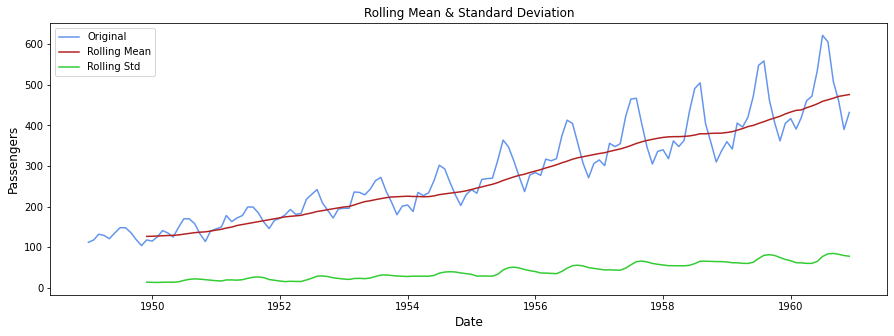

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
#call the test stationarity function to show graph and results
test_stationarity(air_passenger_df['Passengers'],'Date','Passengers')

In [40]:
#from the result, we can see there are 13 lags used

In [41]:
rcParams['figure.figsize'] = 15, 6

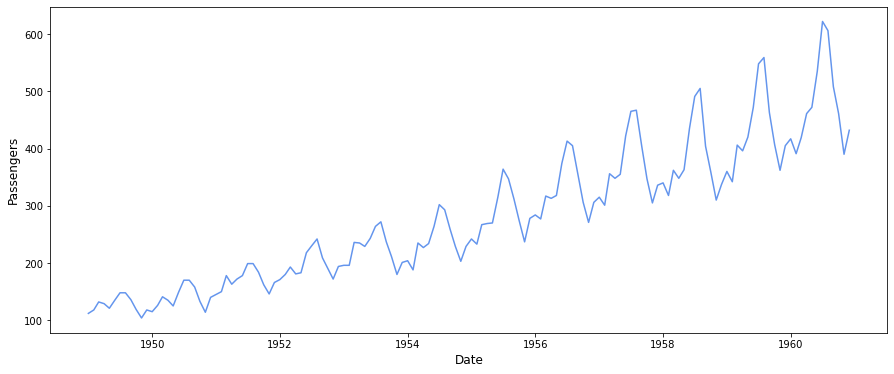

In [42]:
#draw the big picture of our data
plt.plot(air_passenger_df['Passengers'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Passengers', size = 12)
plt.show()

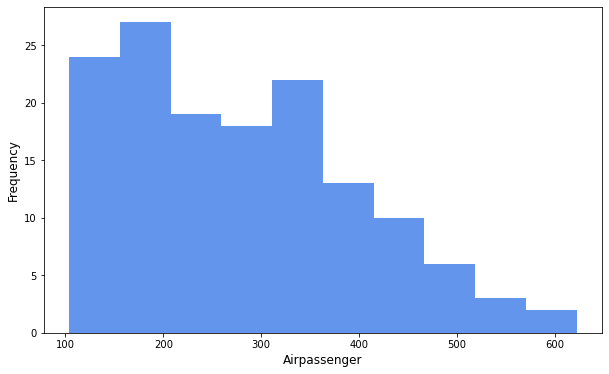

In [43]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(air_passenger_df['Passengers'], color = 'cornflowerblue')
plt.xlabel('Airpassenger', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

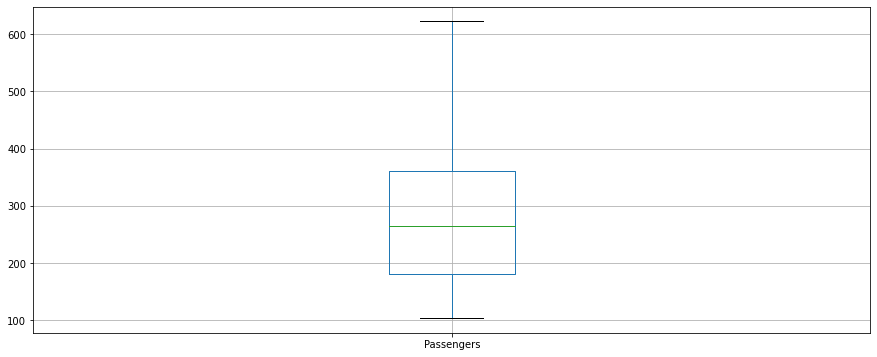

In [44]:
#show boxplot of our data
boxplot = air_passenger_df.boxplot(column=['Passengers'])
boxplot.plot()

plt.show()

## 1.3 ACF & PACF

In [45]:
import statsmodels.graphics.tsaplots as st

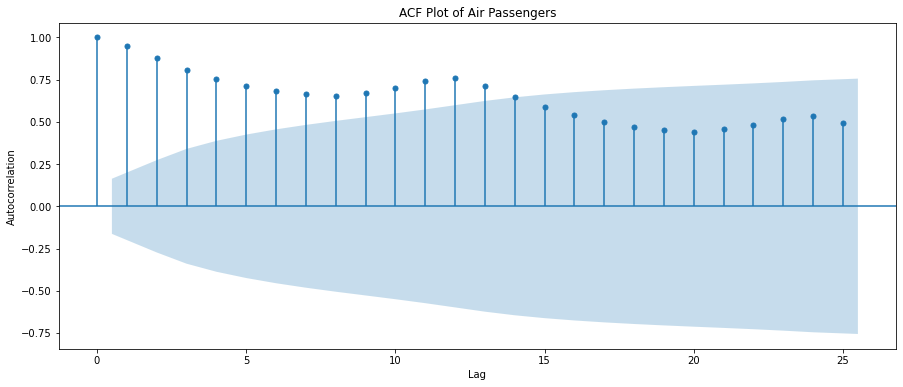

In [46]:
# ACF Plot for air passengers - 25
st.plot_acf(air_passenger_df['Passengers'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

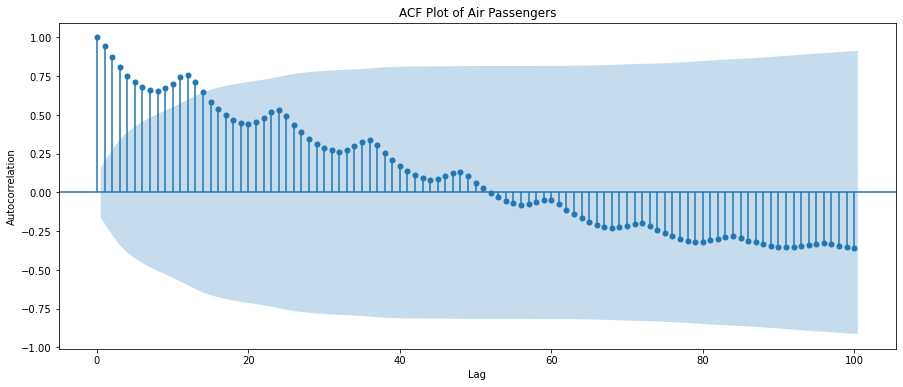

In [47]:
# ACF Plot for air passengers - 100
st.plot_acf(air_passenger_df['Passengers'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

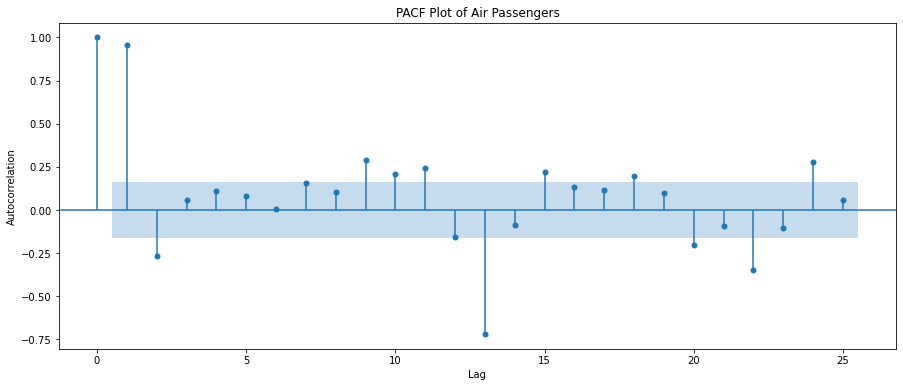

In [48]:
# PACF Plot for air passengers - 25
st.plot_pacf(air_passenger_df['Passengers'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

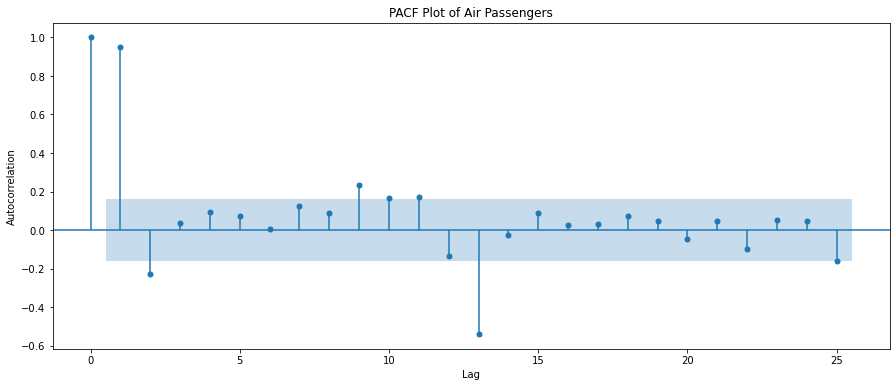

In [49]:
# PACF Plot for air passengers - 25 ywmle
st.plot_pacf(air_passenger_df['Passengers'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

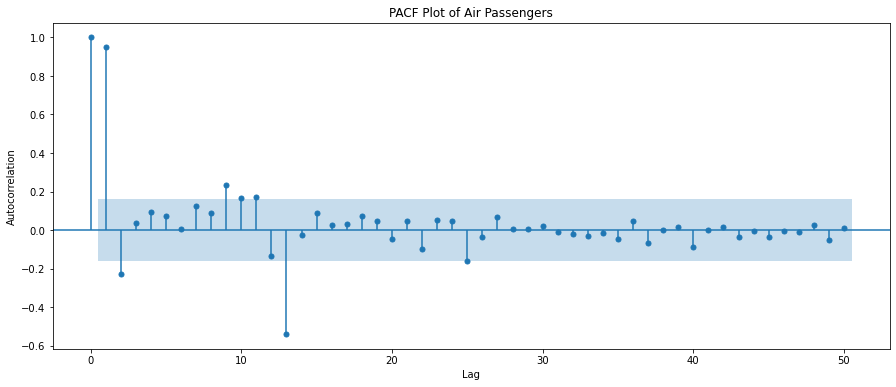

In [50]:
# PACF Plot for air passengers - 50 ywmle
st.plot_pacf(air_passenger_df['Passengers'], method='ywmle', lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

## 1.4 AR model

In [51]:
#import package for AR model
from statsmodels.tsa.ar_model import AutoReg

In [52]:
#split our data into 2 sets, one for training and one for testing
#we have total 144 observations, and it is a small dataset
#so we choose 100(70%) as our training data, and 44(30%) as our testing data
air_train_data = air_passenger_df['Passengers'][:100]
air_test_data = air_passenger_df['Passengers'][100:]

In [53]:
#use autoregressive model to train our data with lags = 13
air_ar_model = AutoReg(air_train_data, lags=13).fit()
#show results tables of the data after trained by AR model
print(air_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  100
Model:                    AutoReg(13)   Log Likelihood                -313.023
Method:               Conditional MLE   S.D. of innovations              8.838
Date:                Sun, 05 Dec 2021   AIC                              4.703
Time:                        11:52:38   BIC                              5.128
Sample:                    02-01-1950   HQIC                             4.874
                         - 04-01-1957                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          2.2452      3.543      0.634      0.526      -4.700       9.190
Passengers.L1      0.7710      0.085      9.040      0.000       0.604       0.938
Passengers.L2     -0.0906      0.083

Text(0.5, 1.0, 'AR Model forecasting versus test data for Air Passenger dataset')

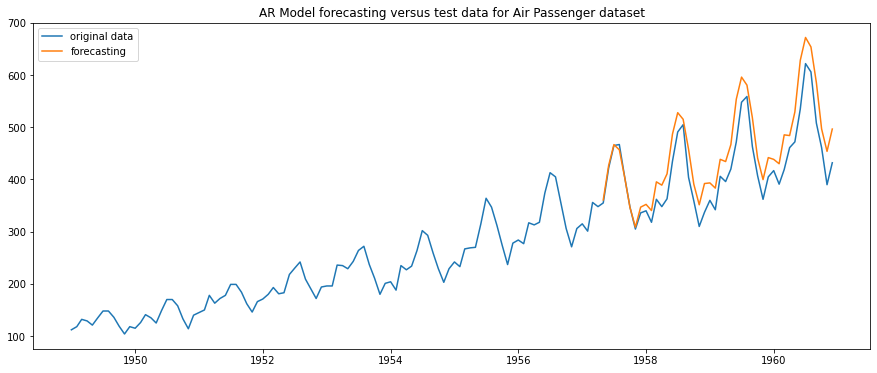

In [54]:
#use AR model to do forecasting
air_pred = air_ar_model.predict(start=len(air_train_data), end=(len(air_passenger_df)-1), dynamic=False)
#draw the graph of original data
plt.plot(air_passenger_df['Passengers'],label='original data')
#add forecasting data to the graph
plt.plot(air_pred, label='forecasting')
plt.legend()
plt.title('AR Model forecasting versus test data for Air Passenger dataset')

In [55]:
#import package to calculate mae score for methods
from sklearn.metrics import mean_absolute_error as mae
#calculate mae score for AR model
mae(air_test_data, air_pred)

36.97778991739787

## 1.5 MA model

### forecasting

In [56]:
import math

a=len(air_passenger_df)
train_len = math.ceil(0.8*a)
train = air_passenger_df[0:train_len] # first 80% of data months as training set
test = air_passenger_df[train_len:] # last 20% of data
y = air_passenger_df.copy()
ma_window = 12
y['predict'] = air_passenger_df['Passengers'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean


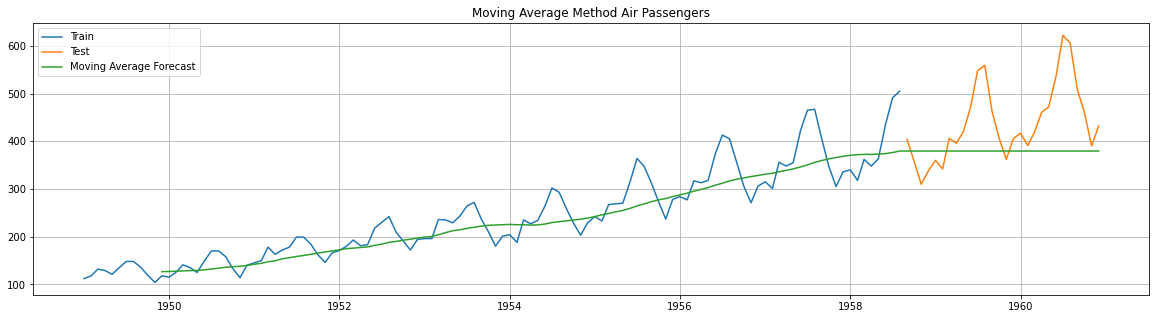

In [57]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['Passengers'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Air Passengers')
plt.show()

## 1.6 ARIMA model

In [23]:
# Develop an IMA(1,1) model for the data
# model = ARIMA(m1_df.Measurement, order=(0,1,1))
# model_fit = model.fit()

# Find the best ARIMA model for air passenger dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(air_passenger_df['Passengers'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

# summary of fit model
#print(best_model_fit.summary())

The smallest AIC is  1336.7756157481379
The smallest BIC is  1360.478372790217
According to AIC, the best choice of parameters [p,d,q] is  [3, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [3, 1, 3]


## 1.7 SARIMAX 

In [24]:
air_df = pd.read_csv("AirPassengers.csv", names = ["Month", "Passengers"], header=0)

In [25]:
def mov_avg(series, period):
    s=pd.Series(index=series.index, dtype=np.double)
    for i in range(period-1, len(series)): #create the loop situation
        s[i]=(series[i-period+1 : i+1]).mean()       
    return s

In [26]:
per_12=mov_avg(air_df.Passengers, 12)

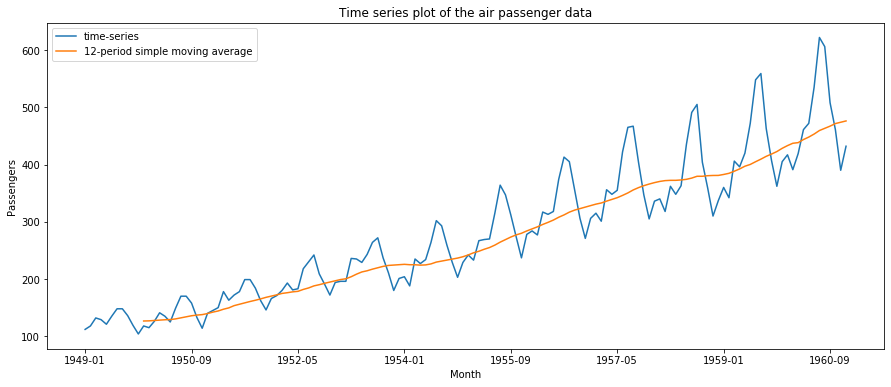

In [27]:
plt.figure()
plt.title('Time series plot of the air passenger data')
plt.plot(air_df.Month,air_df.Passengers, label='time-series')
plt.plot(air_df.Month, per_12, label='12-period simple moving average')
plt.xticks(np.arange(0, len(air_df)+1, 20))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(air_df.Passengers.iloc[0:100], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [29]:
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is 641.7824661840992
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [0, 1, 3, 1, 1, 2]


In [30]:
best_model_air=SARIMAX(air_df.Passengers.iloc[0:100], order=(0, 1, 3), 
                       seasonal_order=(1, 1, 2, 12)).fit(disp=False)
best_model_air.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  100
Model:             SARIMAX(0, 1, 3)x(1, 1, 2, 12)   Log Likelihood                -313.891
Date:                            Fri, 12 Nov 2021   AIC                            641.782
Time:                                    21:21:05   BIC                            659.044
Sample:                                         0   HQIC                           648.733
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3355      0.110     -3.061      0.002      -0.550      -0.121
ma.L2          0.0776      0.145      0.534      0.593      -0.207       0.362
ma.L3         -0.2365      0.157     -1.509      0.131      -0.544       0.071
ar.S.L12       0.9986      0.363      2.755      0.006       0.288       1.709
ma.S.L12      -1.4685      5.271     -0.279      0.781     -11.799       8.862
ma.S.L24       0.4913      2.406      0.204      0.838      -4.223       5.206
sigma2        63.4714    313.851      0.202      0.840    -551.664     678.607
===================================================================================
Ljung-Box (Q):                       30.16   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               1.38   Skew:                             0.40
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### forecasting

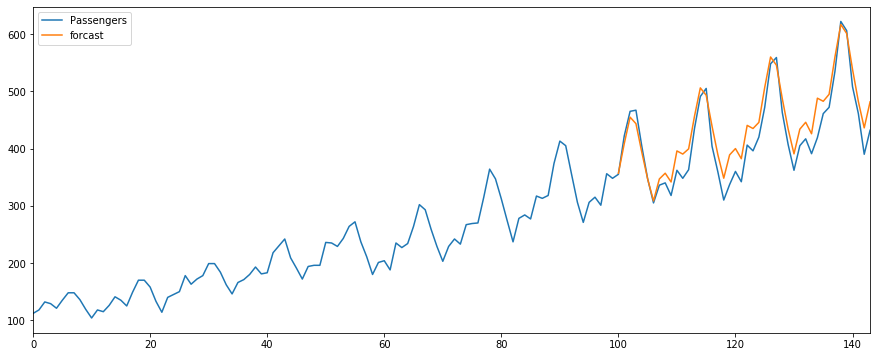

In [31]:
air_df['forcast']=best_model_air.forecast(44)
air_df['forcast'][100:]
air_df[['Passengers','forcast']].plot()

In [32]:
from sklearn.metrics import mean_absolute_error as mae
mae(air_df['Passengers'][100:], air_df['forcast'][100:])

25.88251074335228

# 2. Electric Product (real world dataset)

Description:

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

Here, we mainly use the column 'date' and the production 'IPG2211A2N' to do time series analysis.

This dataset has two columns: Date and value named "PIG2211A2N"

# 2.1 Setting Up The Dataset and Descriptive Statistics

In [58]:
#import the electric product dataset
electric_df = pd.read_csv("Electric_Production.csv")

In [59]:
#take a look for the electric product dataset
print(electric_df)
print(electric_df.info())

          DATE  IPG2211A2N
0     1/1/1985     72.5052
1     2/1/1985     70.6720
2     3/1/1985     62.4502
3     4/1/1985     57.4714
4     5/1/1985     55.3151
..         ...         ...
392   9/1/2017     98.6154
393  10/1/2017     93.6137
394  11/1/2017     97.3359
395  12/1/2017    114.7212
396   1/1/2018    129.4048

[397 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


In [60]:
#change the format and clean the dataset
electric_df['Date'] = pd.to_datetime(electric_df['DATE'])
electric_df = electric_df.drop(columns = 'DATE')
electric_df = electric_df.set_index('Date')
electric_df = electric_df.rename(columns = {'IPG2211A2N':'value'})
electric_df.dropna(inplace=True)

In [61]:
#show the electric dataset after we change the format and clean the dataset
#show the summary of the air passenger dataset
print(electric_df.head())
print(electric_df.describe())

              value
Date               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151
            value
count  397.000000
mean    88.847218
std     15.387834
min     55.315100
25%     77.105200
50%     89.779500
75%    100.524400
max    129.404800


In [62]:
#we can see, after clean our data, we have 398 observations
#the mean number of  is 88.8 with standard deviation 15.3
#the maximum number of international air passengers is 129.4, the minimum is 55.3

# 2.2 Rolling Statistics & Checking Stationarity

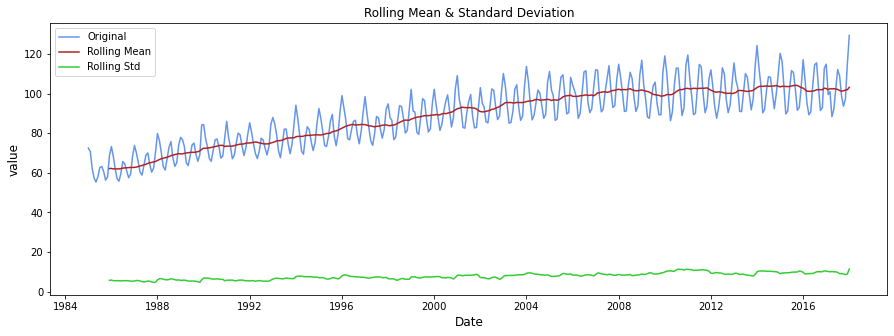

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [63]:
#call the test stationarity function to show graph and results
test_stationarity(electric_df['value'],'Date','value')

In [64]:
#from the result, we can see there are 15 lags used

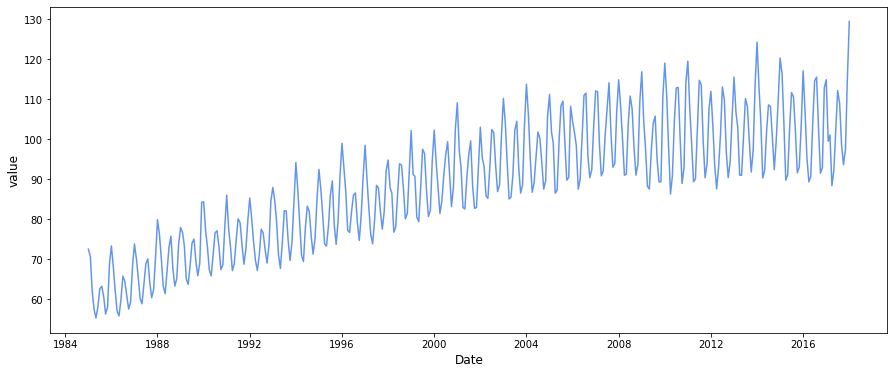

In [65]:
#draw the big picture of our data
plt.plot(electric_df['value'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('value', size = 12)
plt.show()

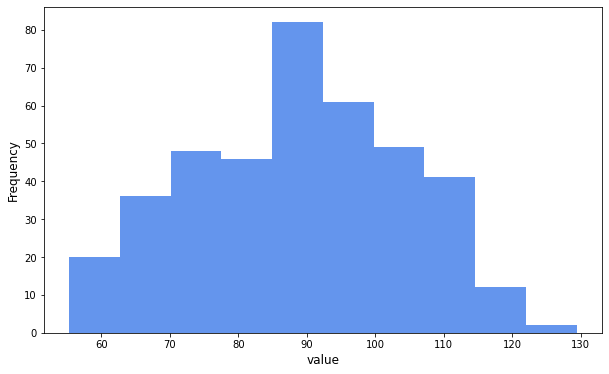

In [66]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(electric_df['value'], color = 'cornflowerblue')
plt.xlabel('value', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

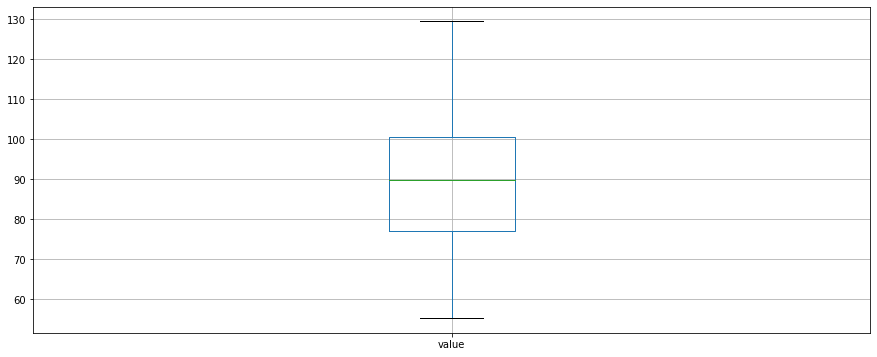

In [67]:
#show boxplot of our data
boxplot = electric_df.boxplot(column=['value'])
boxplot.plot()

plt.show()

## 2.3 ACF & PACF

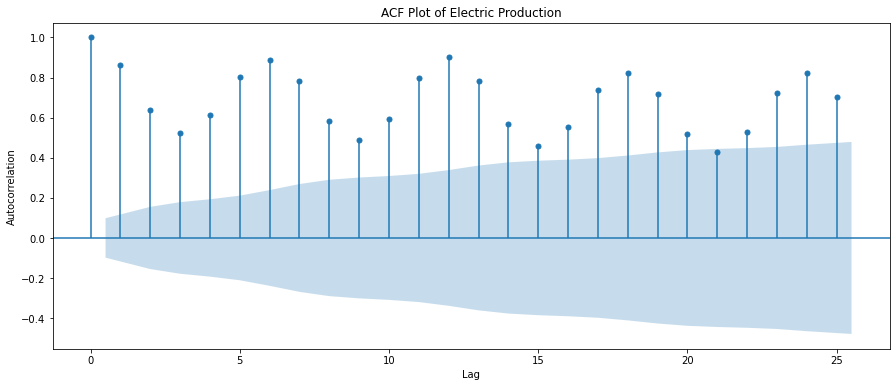

In [68]:
# ACF Plot for electric - 25
st.plot_acf(electric_df['value'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

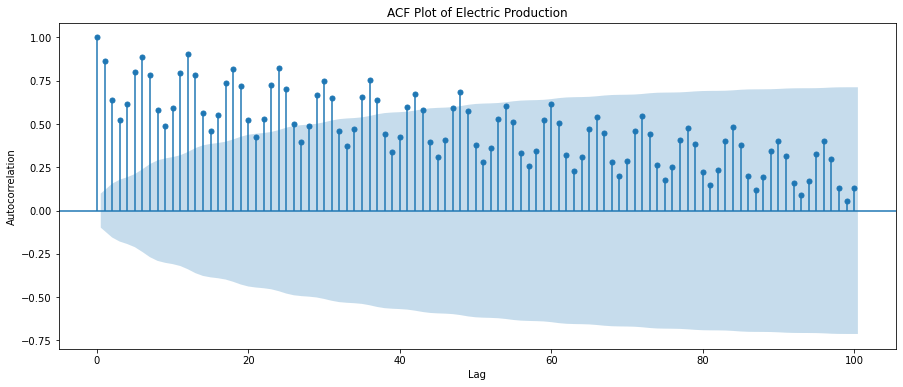

In [69]:
# ACF Plot for electric - 100
st.plot_acf(electric_df['value'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

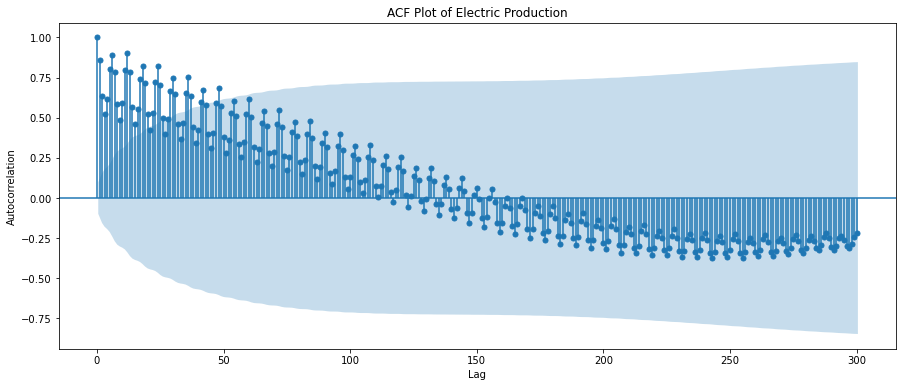

In [70]:
# ACF Plot for electric - 300
st.plot_acf(electric_df['value'], lags = 300)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric Production')
plt.show()

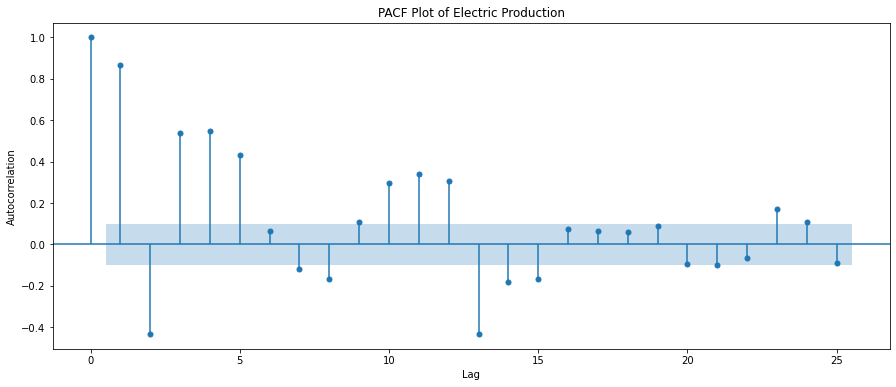

In [71]:
# PACF Plot for Electric Production - 25
st.plot_pacf(electric_df['value'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

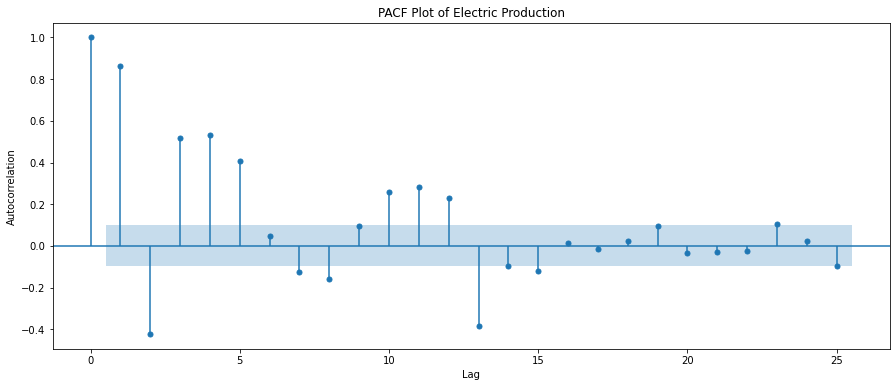

In [72]:
# PACF Plot for Electric Production - 25  method='ywmle'
st.plot_pacf(electric_df['value'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

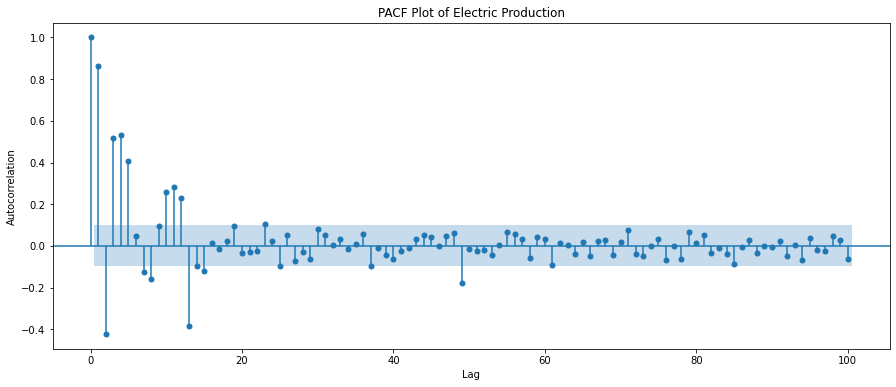

In [73]:
# PACF Plot for Electric Production - 100
st.plot_pacf(electric_df['value'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

## 2.4 AR model

In [74]:
#split our data into 2 sets, one for training and one for testing
#we have total 398 observations, and it is a relatively small dataset
#so we choose 300(75%) as our training data, and 98(25%) as our testing data
electric_train_data = electric_df['value'][:300]
electric_test_data = electric_df['value'][300:]

In [75]:
#use autoregressive model to train our data with lags = 13
electric_ar_model = AutoReg(electric_train_data, lags=15).fit()
#show results tables of the data after trained by AR model
print(electric_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  300
Model:                    AutoReg(15)   Log Likelihood                -650.642
Method:               Conditional MLE   S.D. of innovations              2.373
Date:                Sun, 05 Dec 2021   AIC                              1.847
Time:                        12:05:35   BIC                              2.065
Sample:                    04-01-1986   HQIC                             1.935
                         - 12-01-2009                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5457      1.055      2.413      0.016       0.478       4.613
value.L1       0.5813      0.059      9.798      0.000       0.465       0.698
value.L2      -0.1241      0.069     -1.788      0.0

Text(0.5, 1.0, 'AR Model forecasting versus test data for Electric Production dataset')

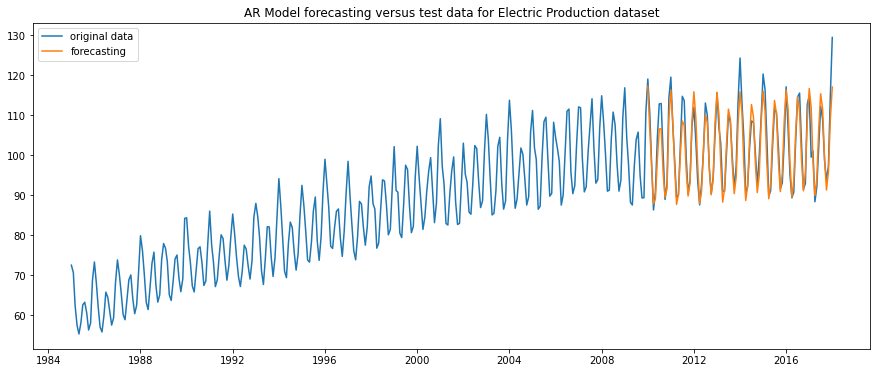

In [76]:
#use AR model to do forecasting
electric_pred = electric_ar_model.predict(start=len(electric_train_data), 
                                          end=(len(electric_df)-1), dynamic=False)
#draw the graph of original data
plt.plot(electric_df['value'],label='original data')
#add forecasting data to the graph
plt.plot(electric_pred,label='forecasting')

plt.legend()
plt.title('AR Model forecasting versus test data for Electric Production dataset')

In [77]:
from sklearn.metrics import mean_absolute_error as mae
mae(electric_test_data, electric_pred)

2.82211554866943

## 2.5 MA model

### forecasting

In [48]:
a=len(electric_df)
train_len = math.ceil(0.8*a)
train = electric_df[0:train_len] # first 80% of data months as training set
test = electric_df[train_len:] # last 20% of data
y = electric_df.copy()
ma_window = 12
y['predict'] = electric_df['value'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

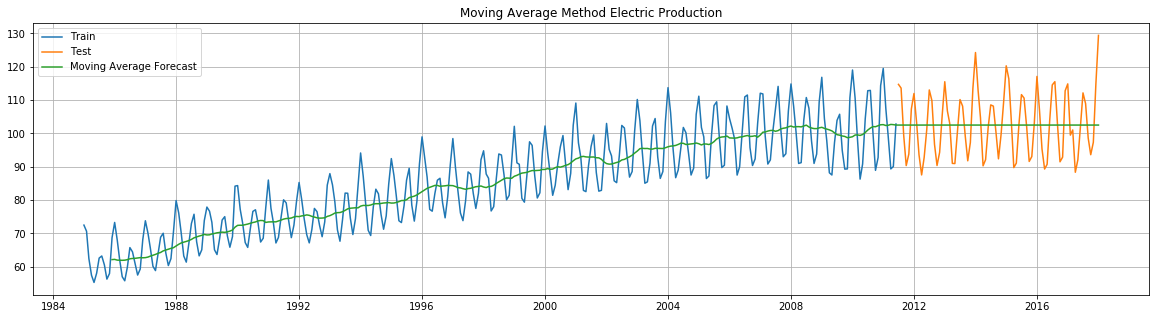

In [49]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['value'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['value'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Electric Production')
plt.show()

## 2.6 ARIMA model

In [51]:
# Find the best ARIMA model for electirc dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(electric_df['value'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

# use AIC or BIC as evaluation criteria. 
# Find the smallest AIC or BIC, and then find the corresponding combination of p,d,q of the smallest AIC or BIC as the best parameter combination.
min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  2116.5505681051886
The smallest BIC is  2144.42046758397
According to AIC, the best choice of parameters [p,d,q] is  [2, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [2, 1, 3]


## 2.7 SARIMAX model

In [52]:
electronic_df=pd.read_csv('Electric_Production.csv', names = ["DATE", "IPG2211A2N"], header=0) #read data from csv

In [53]:
per_6=mov_avg(electronic_df.IPG2211A2N, 6)

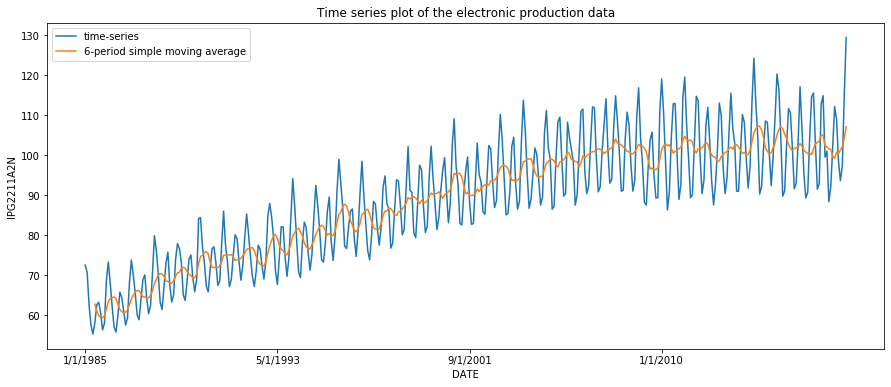

In [54]:
plt.figure()
plt.title('Time series plot of the electronic production data')
plt.plot(electronic_df['DATE'], electronic_df.IPG2211A2N, label='time-series')
plt.plot(electronic_df['DATE'], per_6, label='6-period simple moving average')
plt.xticks(np.arange(0, len(electronic_df)+1, 100))
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.legend()
plt.show()

In [55]:
plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(electronic_df.IPG2211A2N.iloc[0:300], order=(p, d, q), seasonal_order=(P, D, Q, 6))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [56]:
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is 1304.5000490780867
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [3, 1, 3, 2, 1, 3]


In [57]:
best_model_electric=SARIMAX(electronic_df.IPG2211A2N.iloc[0:300], order=(3, 1, 3), 
                            seasonal_order=(2, 1, 3, 6)).fit(disp=False)
best_model_electric.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        IPG2211A2N   No. Observations:                  300
Model:             SARIMAX(3, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -640.250
Date:                           Fri, 12 Nov 2021   AIC                           1304.500
Time:                                   21:29:50   BIC                           1348.662
Sample:                                        0   HQIC                          1322.188
                                           - 300                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6693      0.108     -6.206      0.000      -0.881      -0.458
ar.L2         -0.3515      0.099     -3.550      0.000      -0.546      -0.157
ar.L3          0.4796      0.085      5.615      0.000       0.312       0.647
ma.L1          0.2565      0.087      2.948      0.003       0.086       0.427
ma.L2         -0.2065      0.070     -2.945      0.003      -0.344      -0.069
ma.L3         -0.8453      0.073    -11.518      0.000      -0.989      -0.701
ar.S.L6       -0.1151      0.100     -1.148      0.251      -0.312       0.081
ar.S.L12       0.8779      0.099      8.891      0.000       0.684       1.071
ma.S.L6       -0.9216      0.100     -9.232      0.000      -1.117      -0.726
ma.S.L12      -0.8025      0.060    -13.402      0.000      -0.920      -0.685
ma.S.L18       0.7915      0.082      9.684      0.000       0.631       0.952
sigma2         4.2250      0.282     14.961      0.000       3.672       4.779
===================================================================================
Ljung-Box (Q):                       24.86   Jarque-Bera (JB):                73.17
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### forecasting

In [58]:
electronic_df['forcast']=best_model_electric.forecast(97)
electronic_df['forcast'][300:]

300    115.597619
301    109.022449
302    101.254379
303     90.264567
304     90.602847
          ...    
392     96.908789
393     89.631601
394     91.026767
395    108.987008
396    113.906177
Name: forcast, Length: 97, dtype: float64

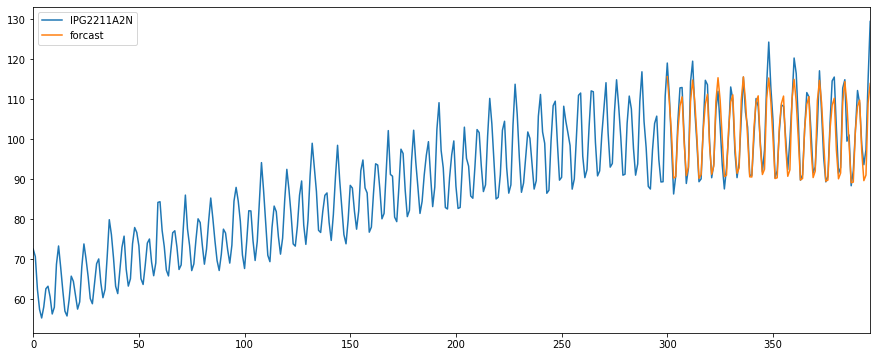

In [59]:
electronic_df[['IPG2211A2N','forcast']].plot()

In [60]:
mae(electronic_df['IPG2211A2N'][300:], electronic_df['forcast'][300:])

2.764790445384649

# 3. Bike (real world dataset)

Description:

The  count  of  bikes  rentedduring each hour data spanning two year. 

This dataset has 12 columns:

datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

## 3.1 Setting Up The Dataset and Descriptive Statistics

In [86]:
#import the bike dataset
bike_df = pd.read_csv("bike.csv")
#take a look for the bike dataset
print(bike_df.head())
print(bike_df.info())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [87]:
#we can see, we have 10886 total observations with 12 columns
#the number of observations is large for us to run ARIMA and SARIMA model
#so we will reduce the size: we change our time interval from 1 hour to 1 day

In [88]:
#add the column date by remove the specific time
date=[]

for i in range(len(bike_df)):
    date.append(bike_df['datetime'].tolist()[i].split(' ')[0])
    
bike_df['date']=date

In [89]:
#reduce size, remove other variables
date_day=[]
count_day=[]

temp_count = 16
for i in range (len(bike_df)-1):
    if(bike_df['date'][i]==bike_df['date'][i+1]):
        temp_count += bike_df['count'][i+1]
        if(i == len(bike_df)-2):
            count_day.append(temp_count)
            date_day.append(bike_df['date'][i])
    else:
        count_day.append(temp_count)
        date_day.append(bike_df['date'][i])
        temp_count = bike_df['count'][i+1]
        

d = {'date': date_day, 'count': count_day}
bike_day_df=pd.DataFrame(data=d)


print(bike_day_df)
print(bike_day_df.info())

           date  count
0    2011-01-01    985
1    2011-01-02    801
2    2011-01-03   1349
3    2011-01-04   1562
4    2011-01-05   1600
..          ...    ...
451  2012-12-15   5047
452  2012-12-16   3786
453  2012-12-17   4585
454  2012-12-18   5557
455  2012-12-19   5267

[456 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    456 non-null    object
 1   count   456 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB
None


In [90]:
#we can see, we have 456 total observations with two columns after we clean our data and reduce the size

In [91]:
#change the format and clean the dataset
bike_day_df['Date'] = pd.to_datetime(bike_day_df['date'])
bike_day_df = bike_day_df.drop(columns = 'date')
bike_day_df = bike_day_df.set_index('Date')
bike_day_df = bike_day_df.rename(columns = {'count':'count'})
bike_day_df.dropna(inplace=True)

In [92]:
#show the bike data set after we change the format and clean the dataset
#show the summary of the bike dataset
print(bike_day_df.head())
print(bike_day_df.describe())

            count
Date             
2011-01-01    985
2011-01-02    801
2011-01-03   1349
2011-01-04   1562
2011-01-05   1600
             count
count   456.000000
mean   4573.412281
std    1868.740135
min     605.000000
25%    3305.500000
50%    4585.500000
75%    5987.500000
max    8714.000000


In [93]:
#we can see, after clean our data, we have 456 observations
#the mean number of bike rent on one day is 4547 with standard deviation 1868
#the maximum number is 8714, the minimum is 605

## 3.2 Rolling Statistics & Checking Stationarity

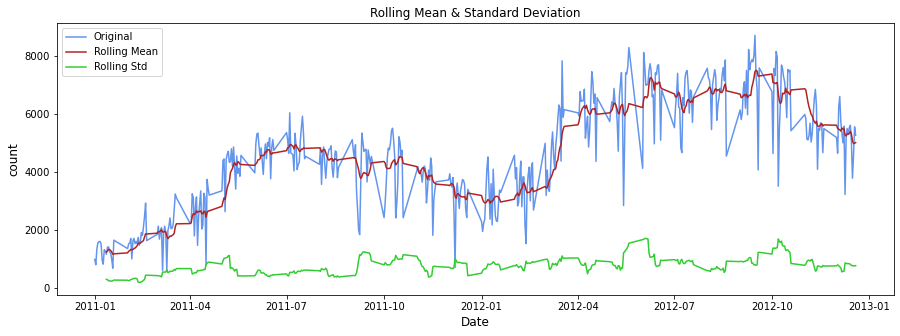

Results of Dickey-Fuller Test:
Test Statistic                  -2.002469
p-value                          0.285492
#Lags Used                       9.000000
Number of Observations Used    446.000000
Critical Value (1%)             -3.445097
Critical Value (5%)             -2.868042
Critical Value (10%)            -2.570233
dtype: float64


In [94]:
#call the test stationarity function to show graph and results
test_stationarity(bike_day_df['count'],'Date','count')

In [95]:
#from the result, we can see there are 9 lags used

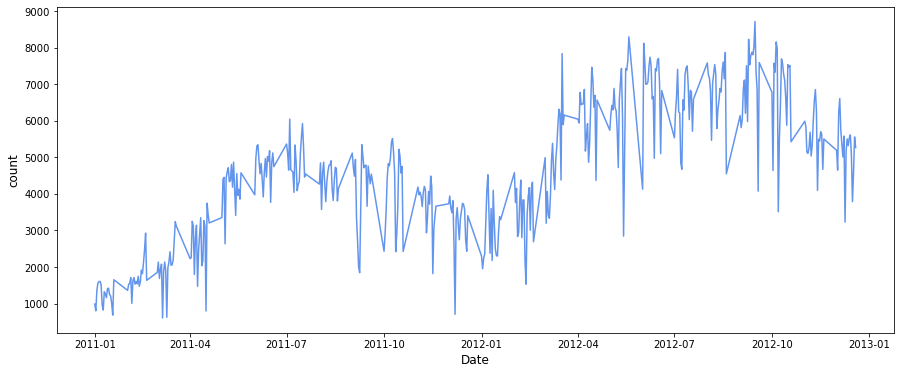

In [96]:
#draw the big picture of our data
plt.plot(bike_day_df['count'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('count', size = 12)
plt.show()

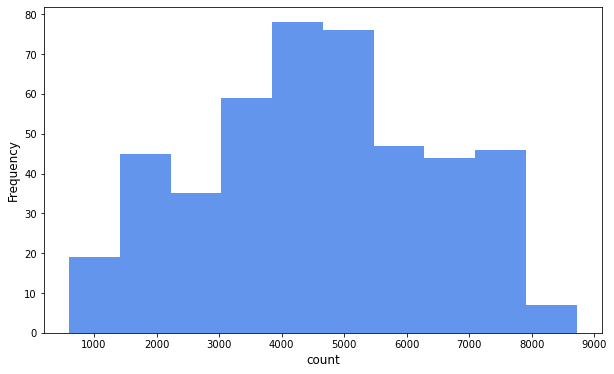

In [97]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(bike_day_df['count'], color = 'cornflowerblue')
plt.xlabel('count', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

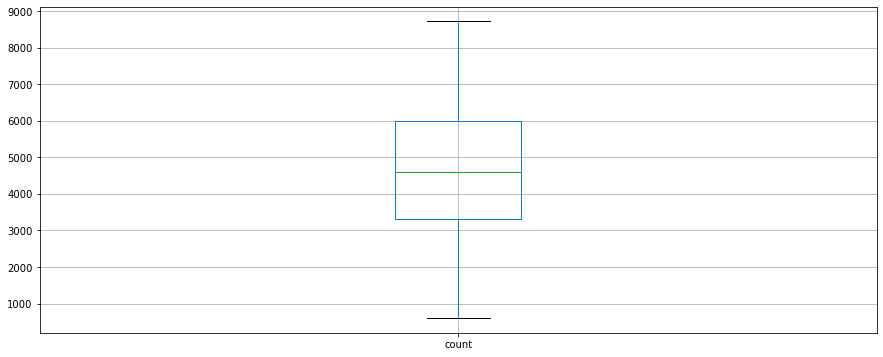

In [98]:
#show boxplot of our data
boxplot = bike_day_df.boxplot(column=['count'])
boxplot.plot()

plt.show()

## 3.3 ACF & PACF

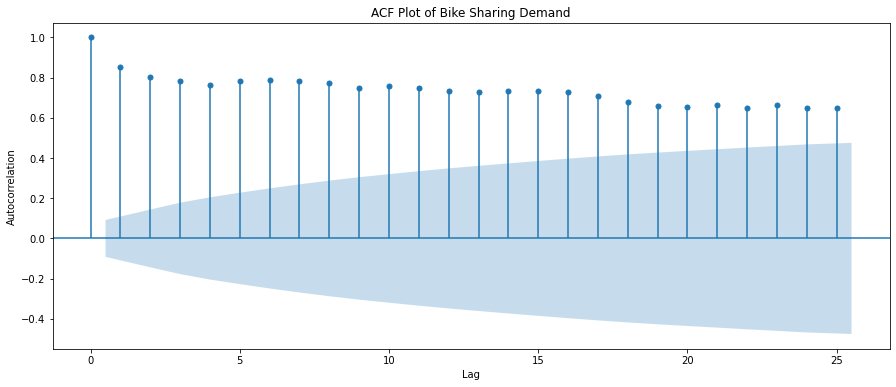

In [99]:
# ACF Plot for bike - 25
st.plot_acf(bike_day_df['count'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()

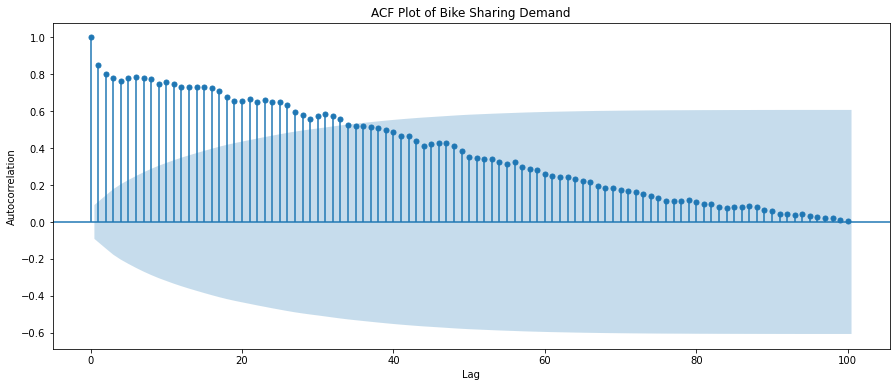

In [100]:
# ACF Plot for bike - 100
st.plot_acf(bike_day_df['count'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()


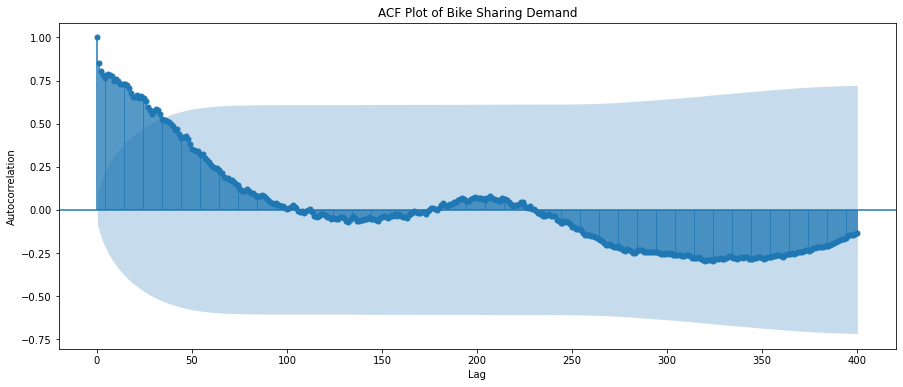

In [101]:
# ACF Plot for bike - 400
st.plot_acf(bike_day_df['count'], lags = 400)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike Sharing Demand')
plt.show()

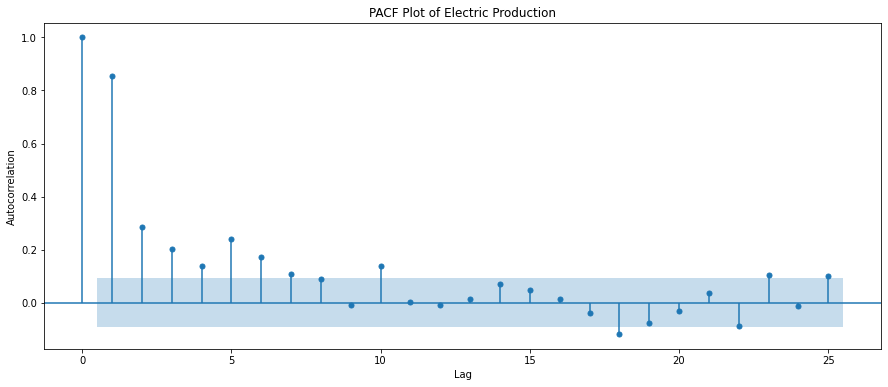

In [102]:
# PACF Plot for bike - 25
st.plot_pacf(bike_day_df['count'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

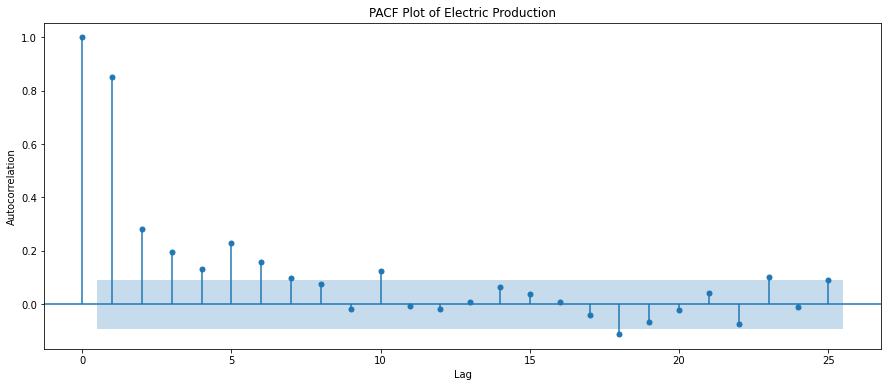

In [103]:
# PACF Plot for bike - 25  method='ywmle'
st.plot_pacf(bike_day_df['count'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

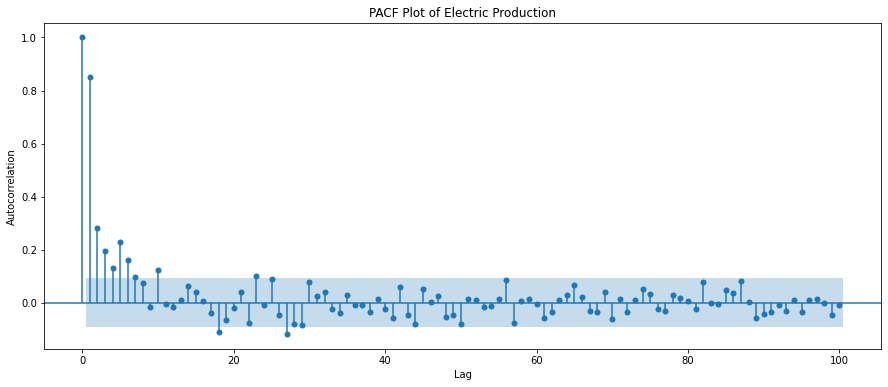

In [104]:
# PACF Plot for bike - 100  method='ywmle'
st.plot_pacf(bike_day_df['count'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric Production')
plt.show()

## 3.4 AR model

In [105]:
#split our data into 2 sets, one for training and one for testing
#we have total 456 observations, and it is a relative large dataset
#so we choose 350(77%) as our training data, and 106(23%) as our testing data
bike_train_data = bike_day_df['count'][:350]
bike_test_data = bike_day_df['count'][350:]

In [106]:
#use autoregressive model to train our data with lags = 7
bike_ar_model = AutoReg(bike_train_data, lags=7).fit()
#show results tables of the data after trained by AR model
print(bike_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  count   No. Observations:                  350
Model:                     AutoReg(7)   Log Likelihood               -2781.747
Method:               Conditional MLE   S.D. of innovations            805.217
Date:                Sun, 05 Dec 2021   AIC                             13.435
Time:                        12:23:28   BIC                             13.535
Sample:                             7   HQIC                            13.475
                                  350                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    244.8336    122.059      2.006      0.045       5.602     484.065
count.L1       0.4148      0.054      7.712      0.000       0.309       0.520
count.L2       0.0832      0.058      1.445      0.1

Text(0.5, 1.0, 'AR Model forecasting versus test data for Bike dataset')

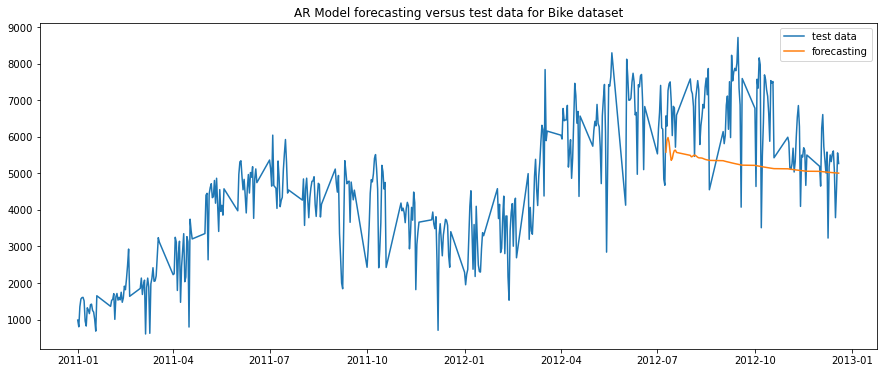

In [107]:
#use AR model to do forecasting
bike_pred = bike_ar_model.predict(start=len(bike_train_data), 
                                          end=(len(bike_day_df)-1), dynamic=False)
bike_pred=bike_pred.to_frame(name="count")
bike_pred['Date'] = bike_test_data.index

bike_pred = bike_pred.set_index('Date')
#draw the graph of original data
plt.plot(bike_day_df['count'],label='original data')
#add forecasting data to the graph
plt.plot(bike_pred,label='forecasting')

plt.legend()
plt.title('AR Model forecasting versus test data for Bike dataset')

In [108]:
#calculate mae score for AR model
mae(bike_test_data, bike_pred)

1258.5311766346251

## 3.5 MA model

### forecasting

In [93]:
a=len(bike_day_df)
train_len = math.ceil(0.8*a)
train =bike_day_df[0:train_len] # first 80% of data months as training set
test = bike_day_df[train_len:] # last 20% of data
y = bike_day_df.copy()
ma_window = 12
y['predict'] = bike_day_df['count'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

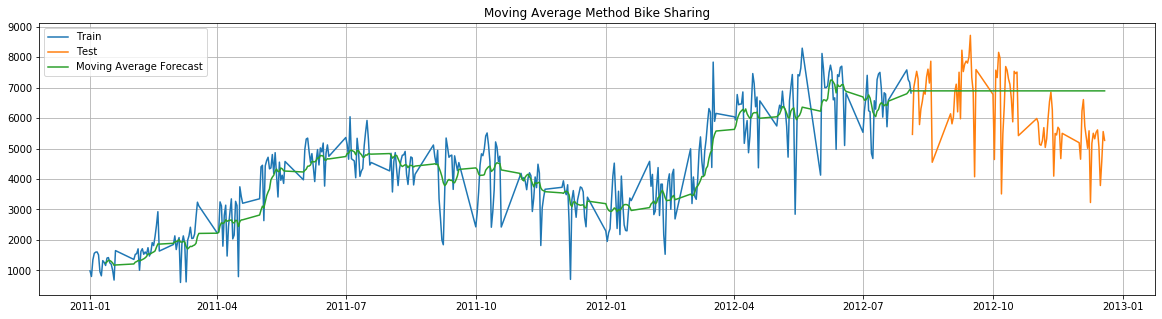

In [94]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['count'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['count'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Bike Sharing')
plt.show()

## 3.6 ARIMA model

In [96]:
# Find the best ARIMA model for bike dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(bike_day_df['count'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  7427.254338037993
The smallest BIC is  7448.1781948862
According to AIC, the best choice of parameters [p,d,q] is  [3, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [1, 1, 1]


## 3.7 SARIMAX model

In [99]:
bike_df = pd.read_csv("train.csv")

date=[]
for i in range(len(bike_df)):
    date.append(bike_df['datetime'][i][0:10])
bike_df['date']=date
bike_df=bike_df[['date','count']]
bike_df=bike_df.groupby(['date']).sum()
bike_df=bike_df.reset_index()


In [100]:
per_6=mov_avg(bike_df['count'], 6)

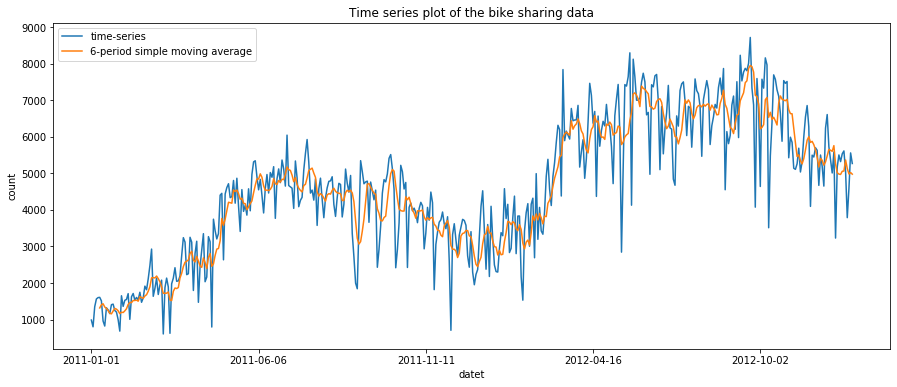

In [101]:
plt.figure()
plt.title('Time series plot of the bike sharing data')
plt.plot(bike_df['date'], bike_df['count'], label='time-series')
plt.plot(bike_df['date'], per_6, label='6-period simple moving average')
plt.xticks(np.arange(0, len(bike_df)+1, 100))
plt.xlabel('datet')
plt.ylabel('count')
plt.legend()
plt.show()

In [102]:
plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(bike_df['count'].iloc[0:350], order=(p, d, q), seasonal_order=(P, D, Q, 6))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [103]:
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is 5596.267400803708
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [1, 1, 1, 1, 1, 1]


In [104]:
best_model_bike=SARIMAX(bike_df['count'].iloc[0:350], order=(1, 1, 3), 
                        seasonal_order=(1, 1, 2, 6)).fit(disp=False)
best_model_bike.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             count   No. Observations:                  350
Model:             SARIMAX(1, 1, 3)x(1, 1, 2, 6)   Log Likelihood               -2793.871
Date:                           Fri, 12 Nov 2021   AIC                           5603.743
Time:                                   21:53:17   BIC                           5634.445
Sample:                                        0   HQIC                          5615.972
                                           - 350                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9584      0.076    -12.688      0.000      -1.106      -0.810
ma.L1          0.3646      0.102      3.567      0.000       0.164       0.565
ma.L2         -0.7900      0.056    -14.046      0.000      -0.900      -0.680
ma.L3         -0.1806      0.050     -3.635      0.000      -0.278      -0.083
ar.S.L6        0.9989      0.032     31.275      0.000       0.936       1.062
ma.S.L6       -1.9986      0.067    -29.646      0.000      -2.131      -1.867
ma.S.L12       0.9987      0.067     14.861      0.000       0.867       1.130
sigma2      6.689e+05   2.75e-07   2.43e+12      0.000    6.69e+05    6.69e+05
===================================================================================
Ljung-Box (Q):                       63.31   Jarque-Bera (JB):                82.80
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+27. Standard errors may be unstable.
"""

### forecasting

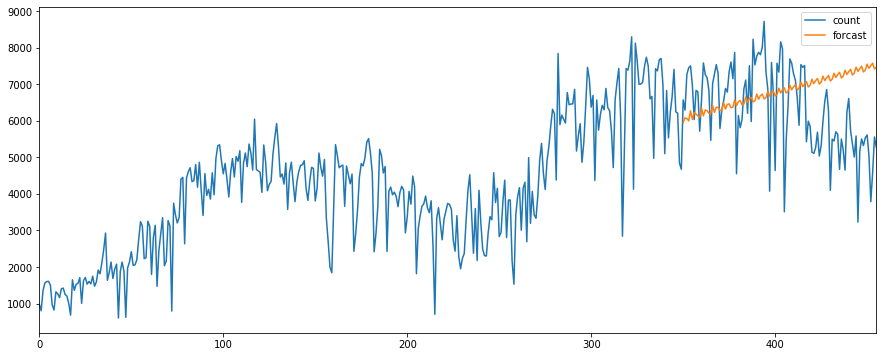

In [105]:
bike_df['forcast']=best_model_bike.forecast(106)
bike_df['forcast'][350:]
bike_df[['count','forcast']].plot()

In [106]:
mae(bike_df['count'][350:], bike_df['forcast'][350:])

1230.793226072094

# 4. Climate (real world dataset)

Description:



## 4.1 Setting Up The Dataset and Descriptive Statistics

In [136]:
#import the climate dataset
climate_df = pd.read_csv("DailyDelhiClimateTrain.csv")
climate_test_df = pd.read_csv("DailyDelhiClimateTest.csv")

In [137]:
#take a look for the air passenger dataset
print(climate_df)
print(climate_df.info())

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------------- 

In [138]:
#we can see, we have 1462 total observations with 5 columns

In [139]:
climate_df=climate_df.drop(columns=['humidity', 'wind_speed','meanpressure'])
climate_test_df=climate_test_df.drop(columns=['humidity', 'wind_speed','meanpressure'])

In [140]:
#change the format and clean the dataset
climate_df['Date'] = pd.to_datetime(climate_df['date'])
climate_df = climate_df.drop(columns = 'date')
climate_df = climate_df.set_index('Date')
climate_test_df['Date'] = pd.to_datetime(climate_test_df['date'])
climate_test_df = climate_test_df.drop(columns = 'date')
climate_test_df = climate_test_df.set_index('Date')
#clean our dataset by dropping null values
climate_df.dropna(inplace=True)

In [141]:
#show the climate dataset after we change the format and clean the dataset
#show the summary of the climate dataset
print(climate_df.head())
print(climate_df.describe())

             meantemp
Date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
          meantemp
count  1462.000000
mean     25.495521
std       7.348103
min       6.000000
25%      18.857143
50%      27.714286
75%      31.305804
max      38.714286


In [142]:
#we can see, after clean our data, we have 1462 observations
#the mean number of mean temperature is 25.495 with standard deviation 7.348
#the maximum number of mean temperature is 38.71, the minimum is 6

## 4.2 Rolling Statistics & Checking Stationarity

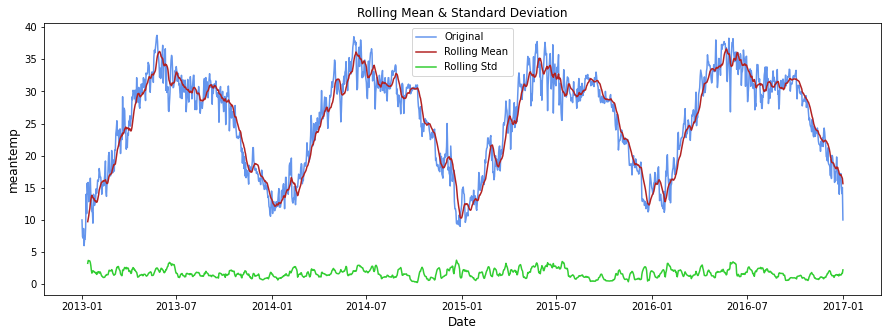

Results of Dickey-Fuller Test:
Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


In [143]:
#call the test stationarity function to show graph and results
test_stationarity(climate_df['meantemp'],'Date','meantemp')

In [144]:
#from the result, we can see there are 10 lags used

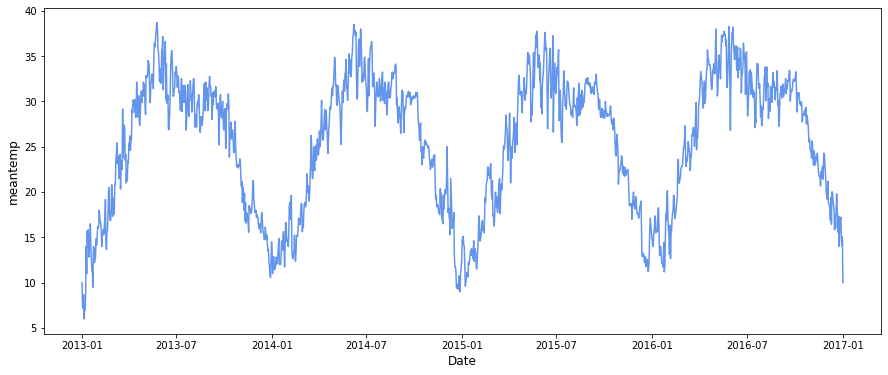

In [145]:
#draw the big picture of our data
plt.plot(climate_df['meantemp'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('meantemp', size = 12)
plt.show()

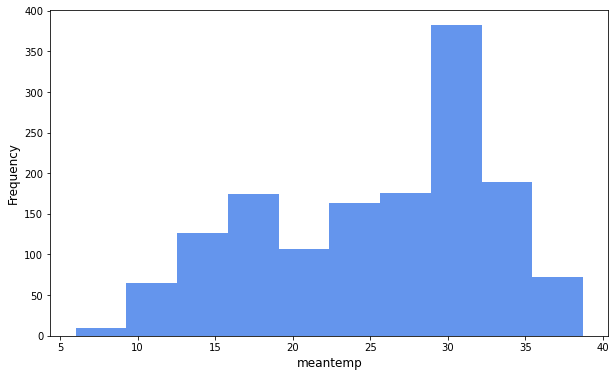

In [146]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(climate_df['meantemp'], color = 'cornflowerblue')
plt.xlabel('meantemp', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

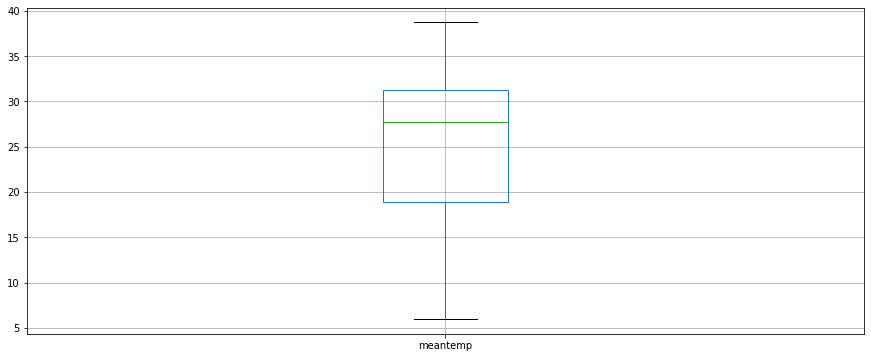

In [147]:
#show boxplot of our data
boxplot = climate_df.boxplot(column=['meantemp'])
boxplot.plot()

plt.show()

## 4.3 ACF & PACF

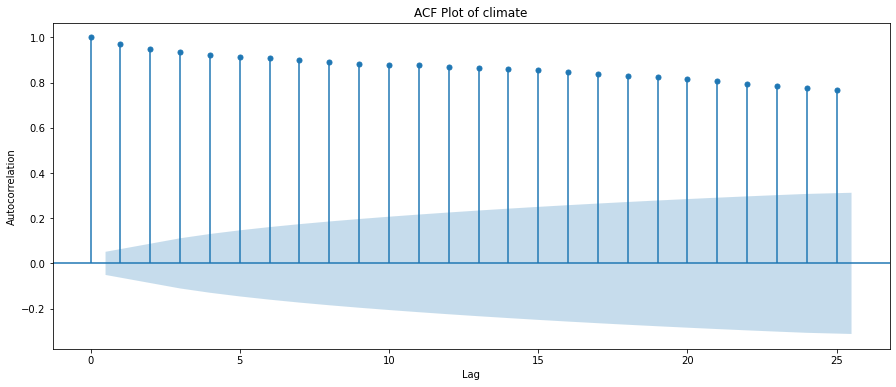

In [148]:
# ACF Plot for climate - 25
st.plot_acf(climate_df['meantemp'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of climate')
plt.show()

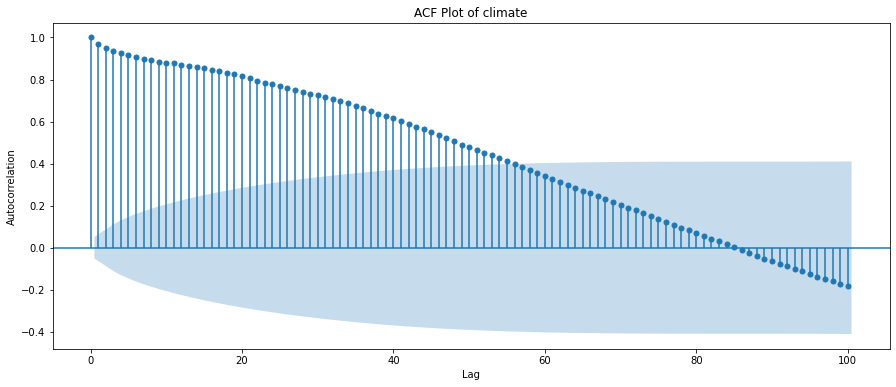

In [149]:
# ACF Plot for climate - 100
st.plot_acf(climate_df['meantemp'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of climate')
plt.show()

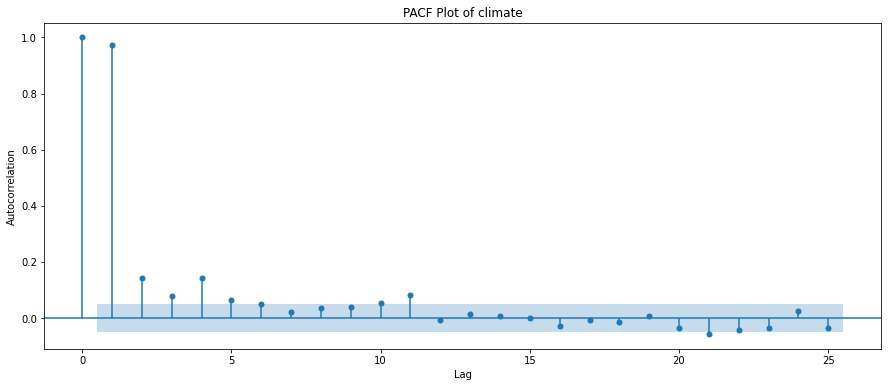

In [150]:
# PACF Plot for climate - 25
st.plot_pacf(climate_df['meantemp'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of climate')
plt.show()

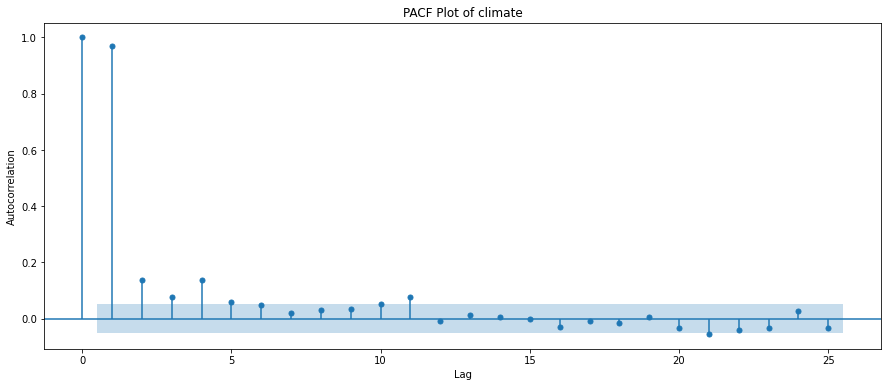

In [151]:
# PACF Plot for climate - 25 ywmle
st.plot_pacf(climate_df['meantemp'],method='ywmle', lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of climate')
plt.show()

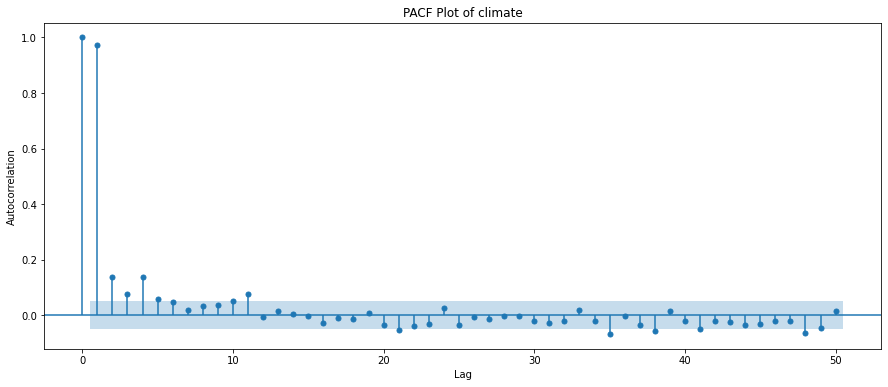

In [152]:
# PACF Plot for climate - 50 ywmle
st.plot_pacf(climate_df['meantemp'],method='ywmle', lags = 50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of climate')
plt.show()

## 4.4 Autoregressive(AR) model

In [175]:
#we hava train and test date, and we already imported them
climate_train_data = climate_df['meantemp']
climate_test_data = climate_test_df['meantemp']

In [176]:
#use autoregressive model to train our data with lags = 10
climate_ar_model = AutoReg(climate_train_data, lags=10).fit()
#show results tables of the data after trained by AR model
print(climate_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                    AutoReg(10)   Log Likelihood               -2737.897
Method:               Conditional MLE   S.D. of innovations              1.595
Date:                Sun, 05 Dec 2021   AIC                              0.950
Time:                        13:15:56   BIC                              0.994
Sample:                    01-11-2013   HQIC                             0.966
                         - 01-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.3557      0.157      2.262      0.024       0.048       0.664
meantemp.L1      0.7793      0.026     29.666      0.000       0.728       0.831
meantemp.L2      0.0521      0.033      1.56

Text(0.5, 1.0, 'AR Model forecasting versus test data for Climate dataset')

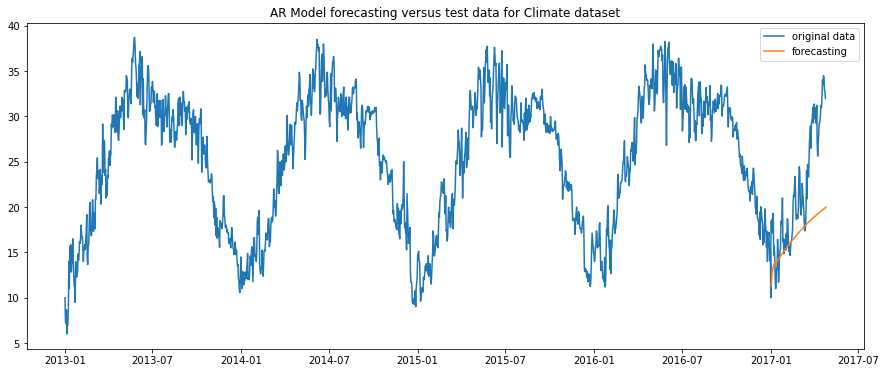

In [177]:
climate_all_df = climate_df.append(climate_test_df)

#use AR model to do forecasting
climate_pred = climate_ar_model.predict(start=len(climate_train_data), 
                                        end=(len(climate_all_df)-1), dynamic=False)
#draw the graph of original data
plt.plot(climate_all_df['meantemp'],label='original data')
#add forecasting data to the graph
plt.plot(climate_pred, label='forecasting')
plt.legend()
plt.title('AR Model forecasting versus test data for Climate dataset')

In [178]:
#calculate mae score for AR model
mae(climate_test_data, climate_pred)

5.105062805516273

# 5. Artificial Sine Data

Description:

The random generated data withmathematically sin function.

The two columns are date and value

## 5.1 Setting Up The Dataset and Descriptive Statistics

In [179]:
#import the sine dataset
sin_df = pd.read_csv("artificial_sine.csv")

In [180]:
#take a look for the sine dataset
print(sin_df)
print(sin_df.info())

            date     sin
0     2018-01-01  100.62
1     2018-01-02  102.34
2     2018-01-03  104.06
3     2018-01-04  105.78
4     2018-01-05  107.49
...          ...     ...
1151  2021-02-25  181.75
1152  2021-02-26  182.73
1153  2021-02-27  183.68
1154  2021-02-28  184.61
1155  2021-03-01  185.52

[1156 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1156 non-null   object 
 1   sin     1156 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.2+ KB
None


In [181]:
#change the format and clean the dataset
sin_df['Date'] = pd.to_datetime(sin_df['date'])
sin_df = sin_df.drop(columns = 'date')
sin_df = sin_df.set_index('Date')
sin_df = sin_df.rename(columns = {'sin':'value'})
sin_df.dropna(inplace=True)

In [182]:
#show the sine dataset after we change the format and clean the dataset
#show the summary of the sine dataset
print(sin_df.head())
print(sin_df.describe())

             value
Date              
2018-01-01  100.62
2018-01-02  102.34
2018-01-03  104.06
2018-01-04  105.78
2018-01-05  107.49
             value
count  1156.000000
mean    102.458979
std      69.908116
min       0.000000
25%      32.390000
50%     107.405000
75%     170.567500
max     200.000000


## 5.2 Rolling Statistics & Checking Stationarity

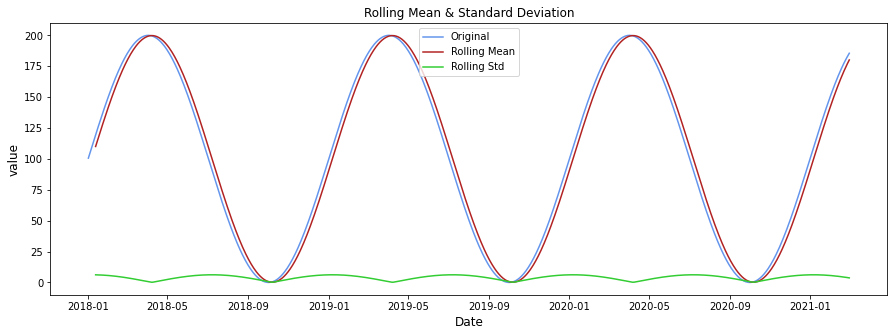

Results of Dickey-Fuller Test:
Test Statistic                -1.613009e+01
p-value                        4.795673e-29
#Lags Used                     2.300000e+01
Number of Observations Used    1.132000e+03
Critical Value (1%)           -3.436140e+00
Critical Value (5%)           -2.864097e+00
Critical Value (10%)          -2.568131e+00
dtype: float64


In [183]:
#call the test stationarity function to show graph and results
test_stationarity(sin_df['value'],'Date','value')

In [184]:
#from the result, we can see there are 23 lags used

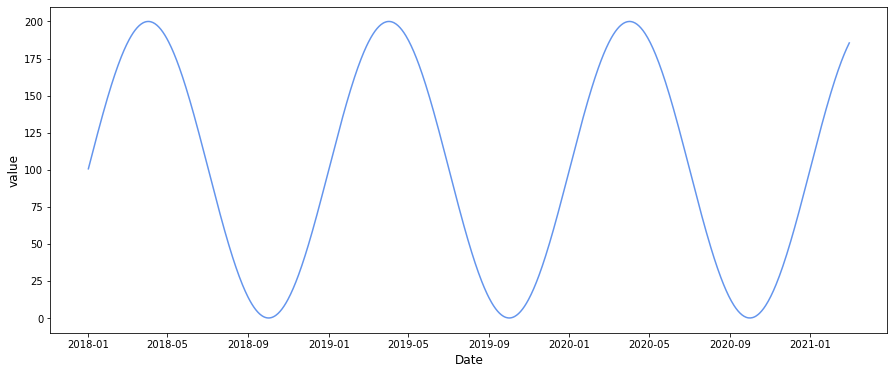

In [185]:
#draw the big picture of our data
plt.plot(sin_df['value'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('value', size = 12)
plt.show()

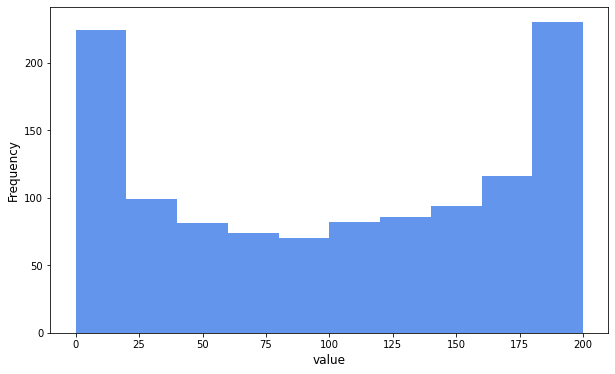

In [186]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(sin_df['value'], color = 'cornflowerblue')
plt.xlabel('value', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

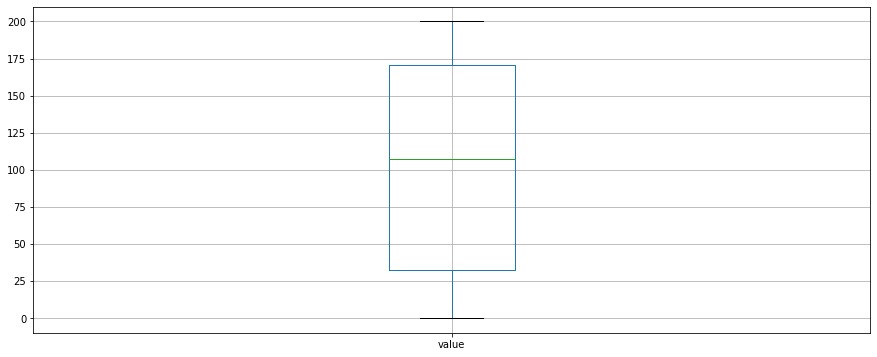

In [187]:
#show boxplot of our data
boxplot = sin_df.boxplot(column=['value'])
boxplot.plot()

plt.show()

# 5.3 ACF & PACF

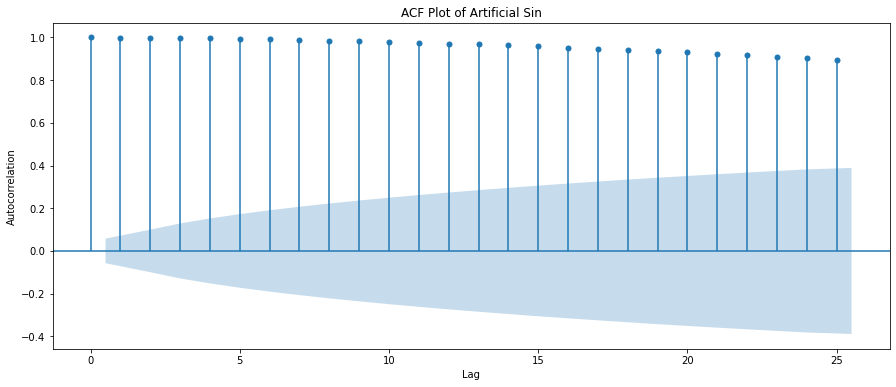

In [188]:
# ACF Plot for sin - 25
st.plot_acf(sin_df['value'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

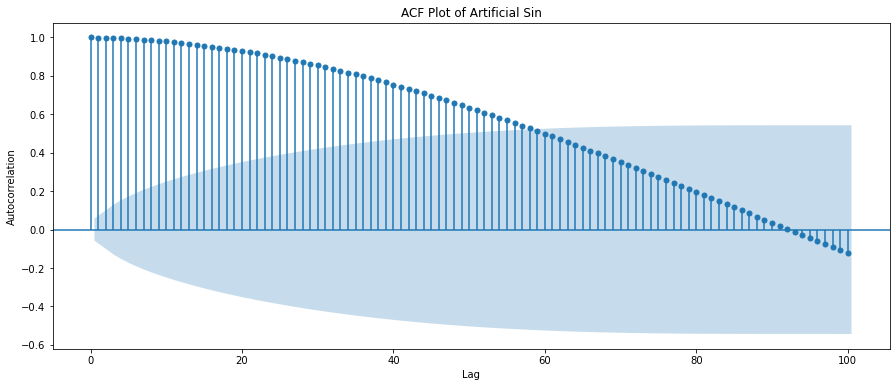

In [189]:
# ACF Plot for sin - 100
st.plot_acf(sin_df['value'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

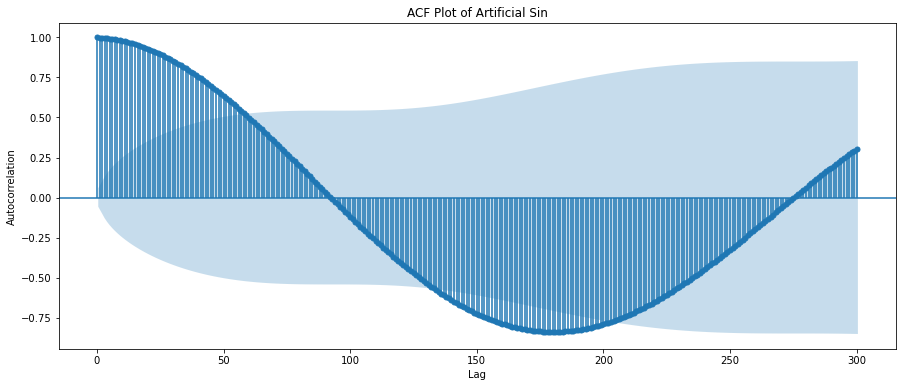

In [190]:
# ACF Plot for sin - 300
st.plot_acf(sin_df['value'], lags = 300)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Sin')
plt.show()

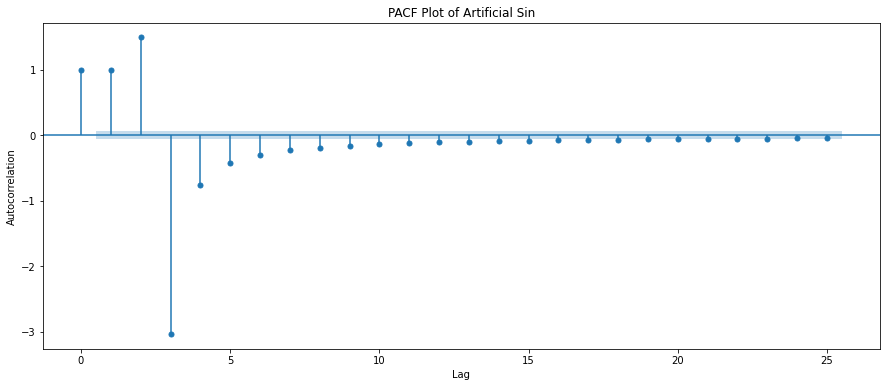

In [191]:
# PACF Plot for sin - 25
st.plot_pacf(sin_df['value'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

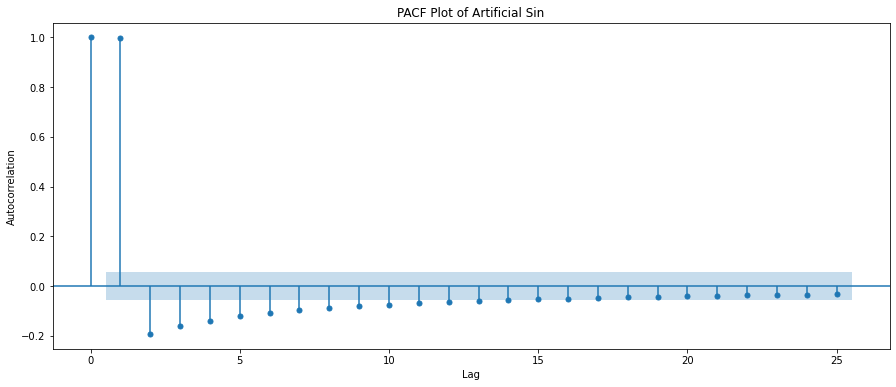

In [192]:
# PACF Plot for Electric Production - 25  method='ywmle'
st.plot_pacf(sin_df['value'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

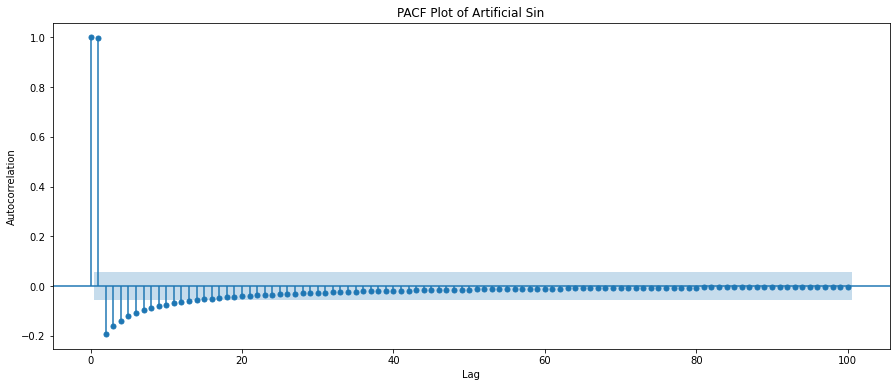

In [193]:
# PACF Plot for Electric Production - 100
st.plot_pacf(sin_df['value'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Sin')
plt.show()

## 5.4 AR model

In [194]:
#we have 1000 train data and 156 test data
sin_train_data = sin_df['value'][:1000]
sin_test_data = sin_df['value'][1000:]

In [195]:
#use autoregressive model to train our data with lags = 23
sin_ar_model = AutoReg(sin_train_data, lags=23).fit()
#show results tables of the data after trained by AR model
print(sin_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                 1000
Model:                    AutoReg(23)   Log Likelihood                4256.330
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Sun, 05 Dec 2021   AIC                            -11.500
Time:                        13:28:47   BIC                            -11.375
Sample:                    01-24-2018   HQIC                           -11.452
                         - 09-26-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4662      0.094     15.678      0.000       1.283       1.650
value.L1       0.1971      0.032      6.169      0.000       0.134       0.260
value.L2       0.1353      0.032      4.217      0.0

Text(0.5, 1.0, 'AR Model forecasting versus test data for Artificial Sine dataset')

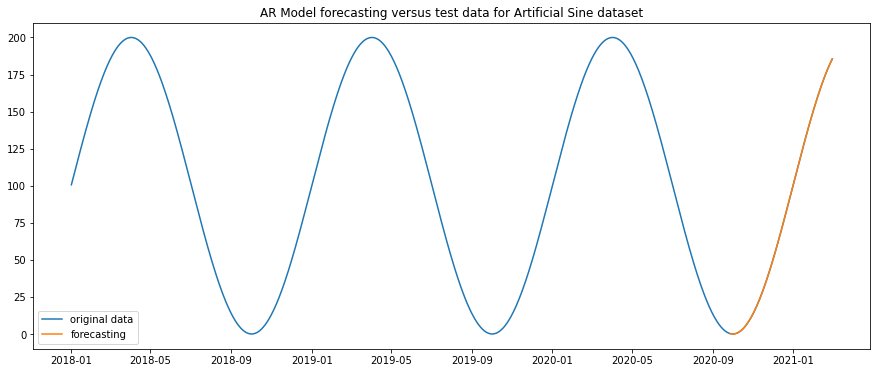

In [196]:
#use AR model to do forecasting
sin_pred = sin_ar_model.predict(start=len(sin_train_data), 
                                          end=(len(sin_df)-1), dynamic=False)
#draw the graph of original data
plt.plot(sin_df['value'],label='original data')
#add forecasting data to the graph
plt.plot(sin_pred,label='forecasting')
plt.legend()
plt.title('AR Model forecasting versus test data for Artificial Sine dataset')

In [197]:
#calculate mae score for AR model
mae(sin_test_data, sin_pred)

0.004613553238871719

## 5.5 MA model

### forecasting 

In [158]:
a=len(sin_df)
train_len = math.ceil(0.8*a)
train =sin_df[0:train_len] # first 80% of data months as training set
test = sin_df[train_len:] # last 20% of data
y = sin_df.copy()
ma_window = 12
y['predict'] = sin_df['value'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

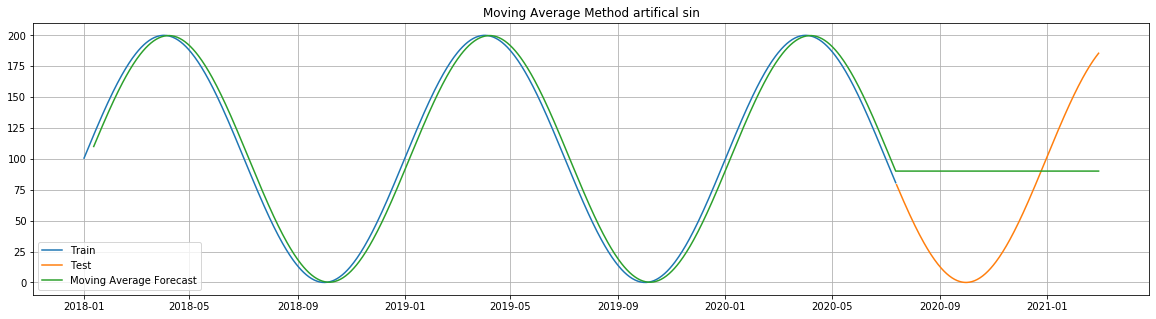

In [159]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['value'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['value'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method artifical sin')
plt.show()

# 5.6 ARIMA model

In [157]:
# Find the best ARIMA model for sin dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(sin_df['value'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

# use AIC or BIC as evaluation criteria. 
# Find the smallest AIC or BIC, and then find the corresponding combination of p,d,q of the smallest AIC or BIC as the best parameter combination.
min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

The smallest AIC is  -9822.749760403272
The smallest BIC is  -9787.38677104258
According to AIC, the best choice of parameters [p,d,q] is  [2, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [2, 1, 3]


# 5.7 SARIMAX model

In [160]:
artificial_sin_df=pd.read_csv('artificial_sine.csv', names = ["date", "sin"], header=0)

In [161]:
per_6=mov_avg(artificial_sin_df.sin, 6)

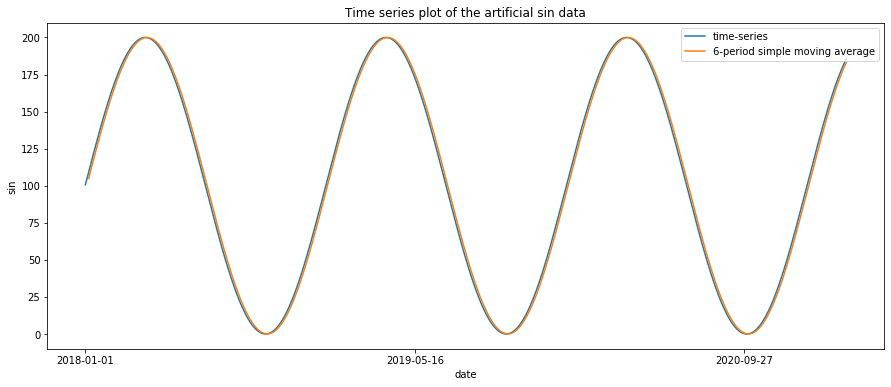

In [162]:
plt.figure()
plt.title('Time series plot of the artificial sin data')
plt.plot(artificial_sin_df.date,artificial_sin_df.sin, label='time-series')
plt.plot(artificial_sin_df.date, per_6, label='6-period simple moving average')
plt.xticks(np.arange(0, len(artificial_sin_df)+1, 500))
plt.xlabel('date')
plt.ylabel('sin')
plt.legend()
plt.show()

In [163]:
plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(artificial_sin_df.sin.iloc[0:1000], order=(p, d, q), seasonal_order=(P, D, Q, 6))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [164]:
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is -7745.583795518896
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [0, 1, 1, 3, 1, 3]


In [165]:
best_model_sine=SARIMAX(artificial_sin_df.sin.iloc[0:1000], order=(0, 1, 1), 
                        seasonal_order=(3, 1, 3, 6)).fit(disp=False)
best_model_sine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               sin   No. Observations:                 1000
Model:             SARIMAX(0, 1, 1)x(3, 1, 3, 6)   Log Likelihood                3880.792
Date:                           Fri, 12 Nov 2021   AIC                          -7745.584
Time:                                   22:51:07   BIC                          -7706.378
Sample:                                        0   HQIC                         -7730.678
                                          - 1000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7462      0.023    -31.994      0.000      -0.792      -0.700
ar.S.L6        0.9930      0.005    199.279      0.000       0.983       1.003
ar.S.L12       0.9820      0.010     99.074      0.000       0.963       1.001
ar.S.L18      -0.9963      0.005   -199.970      0.000      -1.006      -0.987
ma.S.L6       -0.9664      1.812     -0.533      0.594      -4.517       2.584
ma.S.L12      -0.9021      0.095     -9.484      0.000      -1.089      -0.716
ma.S.L18       0.9778      1.822      0.537      0.591      -2.593       4.549
sigma2      2.015e-05   3.74e-05      0.539      0.590   -5.31e-05    9.34e-05
===================================================================================
Ljung-Box (Q):                      229.34   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.00   Prob(JB):                         0.43
Heteroskedasticity (H):               0.85   Skew:                            -0.08
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### forecasting

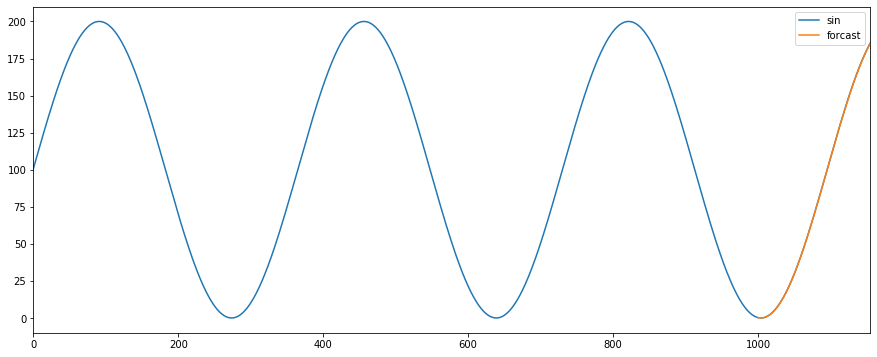

In [166]:
artificial_sin_df['forcast']=best_model_sine.forecast(156)
artificial_sin_df['forcast'][1000:]
artificial_sin_df[['sin','forcast']].plot()

In [167]:
mae(artificial_sin_df['sin'][1000:], artificial_sin_df['forcast'][1000:])

0.07560590776560183

# 6. Artificial data with noise weight 90 and size 250

Description:


## 6.1 Setting Up The Dataset and Descriptive Statistics

In [206]:
n90_df = pd.read_csv('artificial_noise_90.csv',names = ["Date", "value"], header=0)
n90_df = n90_df.set_index('Date')

In [207]:
print(n90_df)
print(n90_df.describe())

           value
Date            
0      -3.140095
1      41.693275
2      43.089651
3     -88.547873
4      25.857551
...          ...
245   311.015229
246   472.136953
247   352.923637
248   487.067246
249   428.889955

[250 rows x 1 columns]
            value
count  250.000000
mean   237.851473
std    164.405587
min   -120.428594
25%     95.195370
50%    236.934694
75%    359.809463
max    666.392448


In [208]:
#we can see, after clean our data, we have 250 observations
#the mean number  is 237 with standard deviation 164
#the maximum number of international air passengers is 666, the minimum is -120

## 5.2 Rolling Statistics & Checking Stationarity

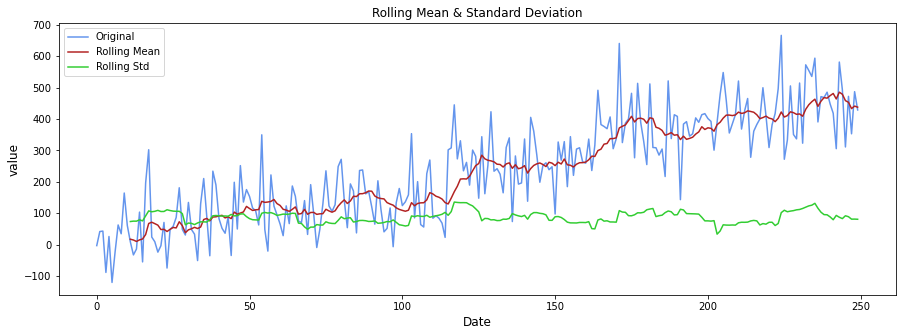

Results of Dickey-Fuller Test:
Test Statistic                  -0.977293
p-value                          0.761456
#Lags Used                      10.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [209]:
#call the test stationarity function to show graph and results
test_stationarity(n90_df['value'],'Date','value')

In [ ]:
#from the result, we can see there are 10 lags used

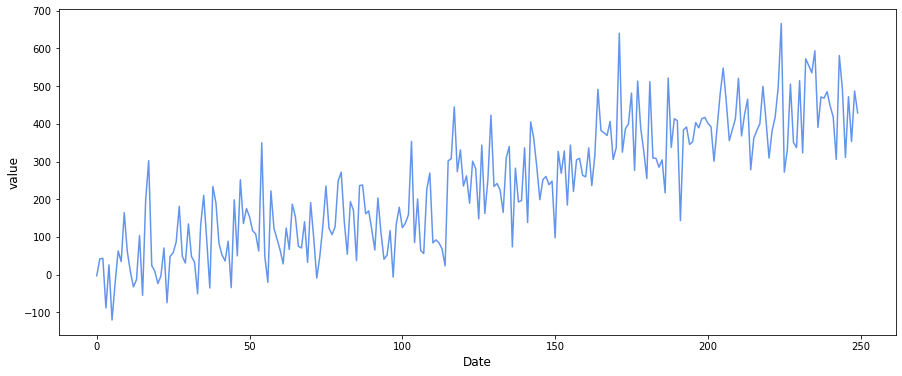

In [210]:
#draw the big picture of our data
plt.plot(n90_df['value'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('value', size = 12)
plt.show()

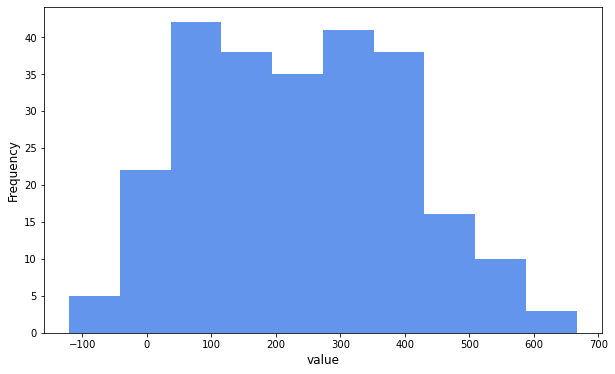

In [211]:
#show histogram of our data
plt.figure(figsize = (10,6))
plt.hist(n90_df['value'], color = 'cornflowerblue')
plt.xlabel('value', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

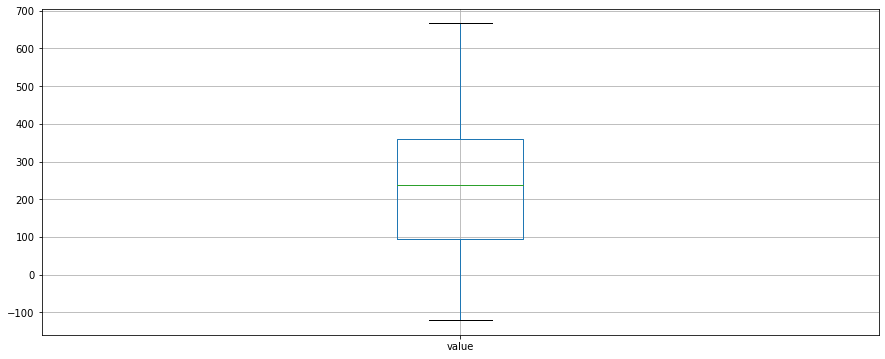

In [212]:
#show boxplot of our data
boxplot = n90_df.boxplot(column=['value'])
boxplot.plot()

plt.show()

## 6.3 ACF & PACF

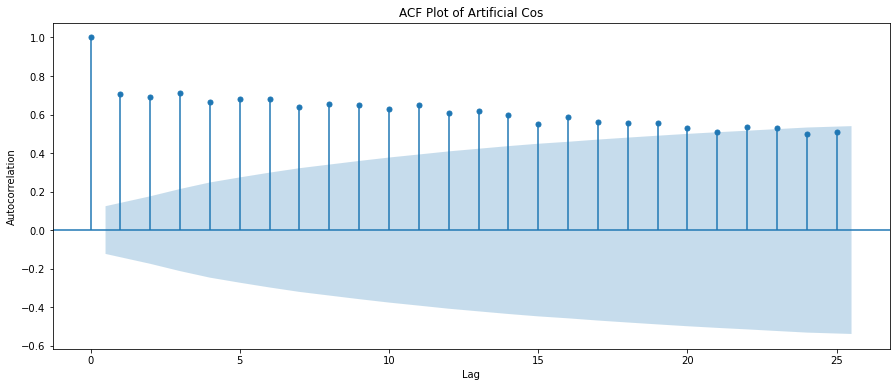

In [213]:
# ACF Plot for noise 90 - 25
st.plot_acf(n90_df['value'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Cos')
plt.show()

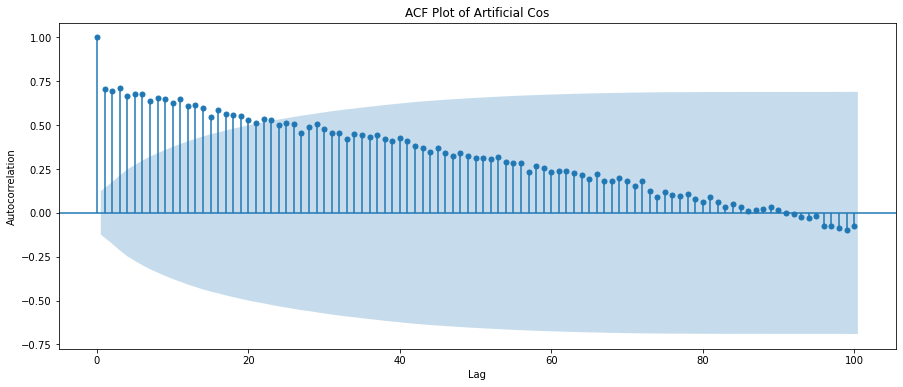

In [214]:
# ACF Plot for noise 90 - 100
st.plot_acf(n90_df['value'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Artificial Cos')
plt.show()

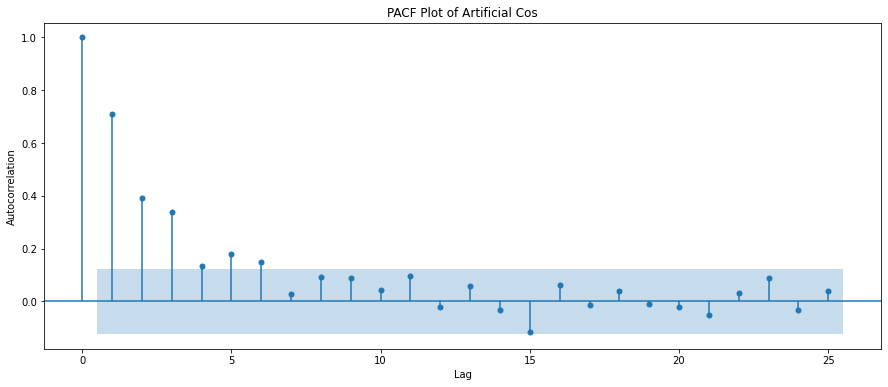

In [215]:
# PACF Plot for noise 90 - 25
st.plot_pacf(n90_df['value'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

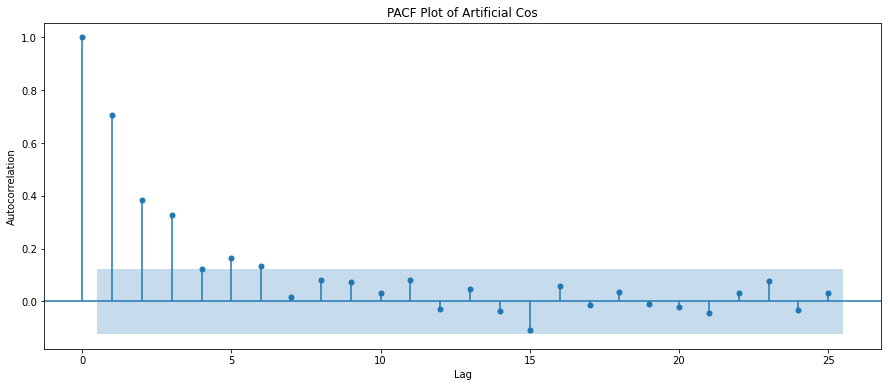

In [216]:
# PACF Plot for noise 90 - 25  method='ywmle'
st.plot_pacf(n90_df['value'],  method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

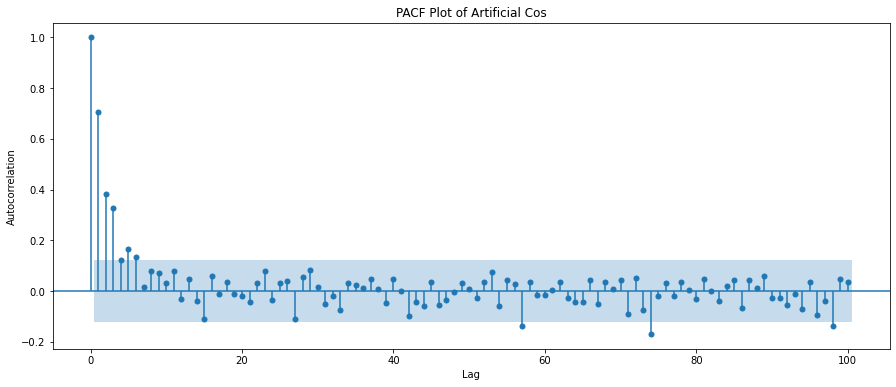

In [217]:
# PACF Plot for noise 90 - 100 method='ywmle'
st.plot_pacf(n90_df['value'],  method='ywmle', lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Artificial Cos')
plt.show()

## 6.4 AR model

In [218]:
#we have 200 train data and 50 test data
n90_train_data = n90_df['value'][:200]
n90_test_data = n90_df['value'][200:]

In [219]:
#use autoregressive model to train our data with lags = 10
n90_ar_model = AutoReg(n90_train_data, lags=10).fit()
#show results tables of the data after trained by AR model
print(n90_ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  200
Model:                    AutoReg(10)   Log Likelihood               -1128.967
Method:               Conditional MLE   S.D. of innovations             92.111
Date:                Sun, 05 Dec 2021   AIC                              9.172
Time:                        13:39:13   BIC                              9.377
Sample:                            10   HQIC                             9.255
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.3502     13.464      1.511      0.131      -6.038      46.739
value.L1       0.1018      0.072      1.416      0.157      -0.039       0.243
value.L2       0.0927      0.072      1.290      0.1

Text(0.5, 1.0, 'AR Model forecasting versus test data for Artificial noise 90 dataset')

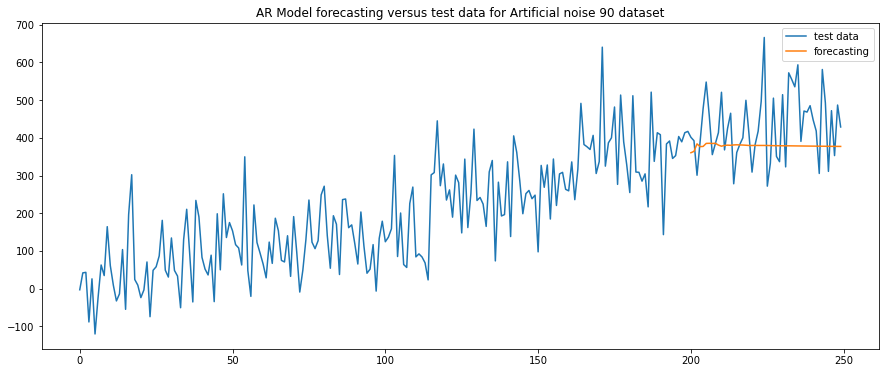

In [220]:
#use AR model to do forecasting
n90_pred = n90_ar_model.predict(start=len(n90_train_data), 
                                          end=(len(n90_df)-1), dynamic=False)
#draw the graph of original data
plt.plot(n90_df['value'],label='test data')
#add forecasting data to the graph
plt.plot(n90_pred,label='forecasting')

plt.legend()
plt.title('AR Model forecasting versus test data for Artificial noise 90 dataset')

In [221]:
#calculate mae score for AR model
mae(n90_test_data, n90_pred)

81.92963000502446